In [1]:
from pylab import*
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import*
from scipy import special

import pandas as pd
import sys 



In [2]:
sep = 28.6 # 28.6, 44.7, 63.2, 104.9, 140.7
pdf_name1='CT14IC'# 'NNPDF40'#, 'CT14IC', 'CT10'
pdf_name2='NNPDF40'# 'NNPDF40'#, 'CT14IC', 'CT10'

IC=0

su2_1= 'no'
charm1='no'
su2_2= 'no'
charm2='yes'
su2_3= 'yes'
charm3='yes'
dati_lp1 = pd.read_csv(r'fit_parameters/bands_/dati_lprot_su_charm_'+str(su2_1)+'_'+str(charm1)+'_scale_'+str(sep)+'_PDF_'+str(pdf_name1)+'_IC_'+str(IC)+'_def.csv')
dati_lp2 = pd.read_csv(r'fit_parameters/bands_/dati_lprot_su_charm_'+str(su2_2)+'_'+str(charm2)+'_scale_'+str(sep)+'_PDF_'+str(pdf_name1)+'_IC_'+str(IC)+'_def.csv')
dati_lp3 = pd.read_csv(r'fit_parameters/bands_/dati_lprot_su_charm_'+str(su2_3)+'_'+str(charm3)+'_scale_'+str(sep)+'_PDF_'+str(pdf_name1)+'_IC_'+str(IC)+'_def.csv')

In [3]:
#dati_lp1


In [4]:
y_lbl=50
x_lbl =50

ers_bar = 1.3  # dimensione barre errore
pnt_dat = 6 # dimensione punti
title_s=35 #dimensione titolo bin
fit_l=2.  # dimensione linea fit

z1=[0.25,.35,.45,.6]
lim=[-0.15,0.15]
ct=1
z_err =[[0.05,0.05,0.05,0.1],[0.05,0.05,0.05,0.3]]


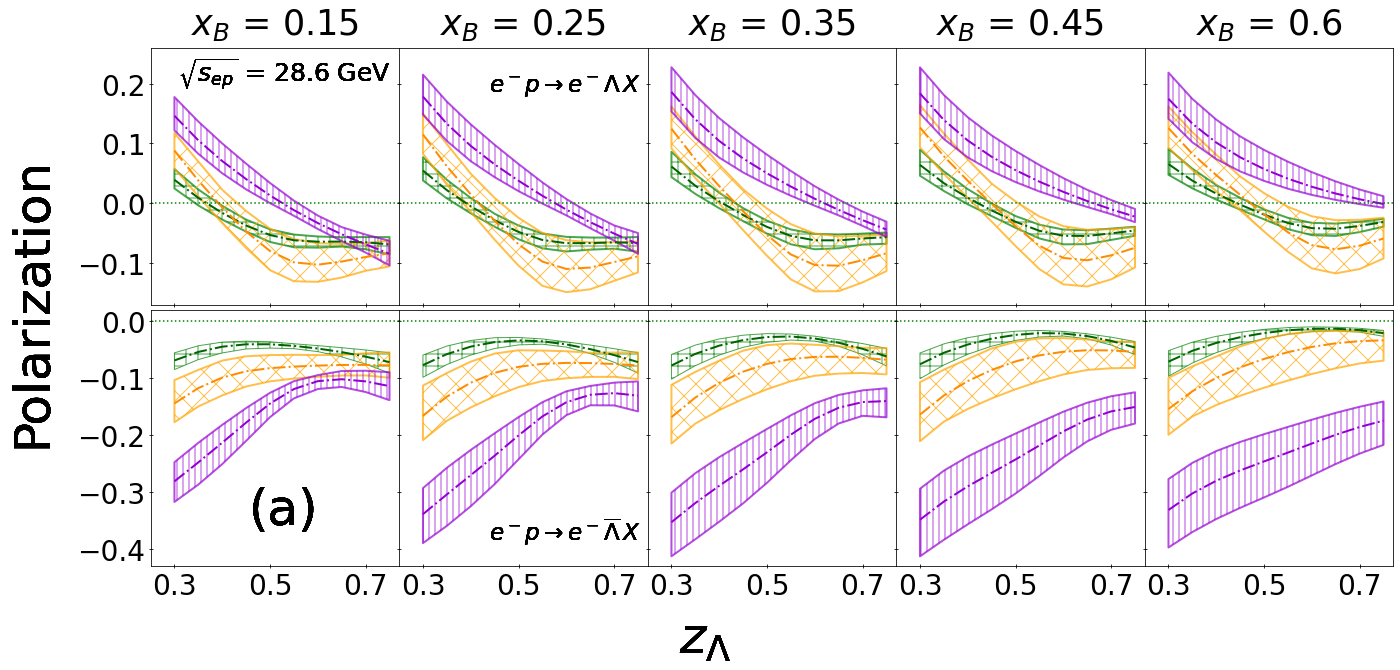

In [5]:
ct=1
xb=[0.15, 0.25, 0.35, 0.45, 0.6 , 0.15, 0.25, 0.35, 0.45, 0.6 ]
 
lim1=[-0.17,0.26]
lim2=[-0.43,0.02]
limx=[0.25,0.77]
fig, axes = plt.subplots(1,10)
for xs,ax in zip(xb,axes):

    #fig.suptitle('$\Lambda$ - $\pi^+$ -- coef = '+str(coef)+' $\chi^2_{dof}$ = '+str(chi),fontsize=30)	
    dt1 = dati_lp1.loc[(dati_lp1['hads1']==310) & (dati_lp1['xb']==xs)& (dati_lp1['hads2']==100)]
    dt12 = dati_lp1.loc[(dati_lp1['hads1']==300) & (dati_lp1['xb']==xs)& (dati_lp1['hads2']==100)]

    dt2 = dati_lp2.loc[(dati_lp2['hads1']==310) & (dati_lp2['xb']==xs)& (dati_lp2['hads2']==100)]
    dt22 = dati_lp2.loc[(dati_lp2['hads1']==300) & (dati_lp2['xb']==xs)& (dati_lp2['hads2']==100)]

    dt3 = dati_lp3.loc[(dati_lp3['hads1']==310) & (dati_lp3['xb']==xs)& (dati_lp3['hads2']==100)]
    dt32 = dati_lp3.loc[(dati_lp3['hads1']==300) & (dati_lp3['xb']==xs)& (dati_lp3['hads2']==100)]


    if ct<=5:
        ax=plt.subplot(2,5,ct)

    ### new fit lines
        ax.plot(dt12.z1,dt12.conv,label='_(1)',linewidth=fit_l,linestyle='-.',color='darkgreen')
        ax.fill_between(dt12.z1,dt12.maxx,dt12.mins,label='(1)',linewidth=fit_l,color="none",hatch="+",edgecolor="green", alpha=0.7)

        ax.plot(dt12.z1,dt22.conv,label='_(2)',linewidth=fit_l,linestyle='-.',color='darkorange')
        ax.fill_between(dt12.z1,dt22.maxx,dt22.mins,label='(2)',linewidth=fit_l,color="none",hatch="x",edgecolor="orange", alpha=0.7)

        ax.plot(dt12.z1,dt32.conv,label='_(3)',linewidth=fit_l,linestyle='-.',color='darkviolet')
        ax.fill_between(dt12.z1,dt32.maxx,dt32.mins,label='(3)',linewidth=fit_l,color="none",hatch="||",edgecolor="darkviolet", alpha=0.7)
        title("$x_B$ = "+str(xs),fontsize=title_s,x=0.5, y=1.03)

        #if xs == 0.25: title("0.2<$z_{\Lambda}$<0.3 ",fontsize=title_s,x=0.5, y=1)
        #if xs == 0.35: title("0.3<$z_{\Lambda}$<0.4 ",fontsize=title_s,x=0.5, y=1)
        #if xs == 0.45: title("0.4<$z_{\Lambda}$<0.5 ",fontsize=title_s,x=0.5, y=1)
        #if xs == 0.6: title("0.5<$z_{\Lambda}$<0.9 ",fontsize=title_s,x=0.5, y=1)

    
        axhline(linewidth=1.5, ls=':', color='g')
    ### experimental points with error bars

        ax.tick_params(axis='both',direction='inout', which='major', labelsize=28)
        ax.set_xticklabels([])
        #ax.set_yticks([-0.1,0.,0.1,0.2])
        if ct ==2 : ax.set_yticklabels([])
        if ct ==3 : ax.set_yticklabels([])
        if ct ==4 : ax.set_yticklabels([])
        if ct ==5 : ax.set_yticklabels([])            
        #if ct ==5 :legend(loc='upper right',bbox_to_anchor=(1.,1), fontsize=25,frameon=False), 
        ax.set_ylim(lim1)
        ax.locator_params(nbins=7, axis='y')
        ax.locator_params(nbins=4, axis='x')
        plt.xticks(np.arange(0.3, 0.75+.25, .2))

            
    #xlabel("$z_{\pi}$",size=12)
    elif ct>5:
        ax=plt.subplot(2,5,ct)
        ax.plot(dt1.z1,dt1.conv,label='_nolegend_',linewidth=fit_l,linestyle='-.',color='darkgreen')
        ax.fill_between(dt1.z1,dt1.maxx,dt1.mins,color="none",hatch="+",edgecolor="green", alpha=0.7)
        #
        ax.plot(dt1.z1,dt2.conv,label='_nolegend_',linewidth=fit_l,linestyle='-.',color='darkorange')
        ax.fill_between(dt1.z1,dt2.maxx,dt2.mins,linewidth=fit_l,color="none",hatch="x",edgecolor="orange", alpha=0.7)
        #
        ax.plot(dt1.z1,dt3.conv,label='_nolegend_',linewidth=fit_l,linestyle='-.',color='darkviolet')
        ax.fill_between(dt1.z1,dt3.maxx,dt3.mins,linewidth=fit_l,color="none",hatch="||",edgecolor="darkviolet", alpha=0.7)

        axhline(linewidth=1.5, ls=':', color='g')
        ax.set_ylim(lim2)
        ax.locator_params(nbins=6, axis='y')
        #ax.locator_params(nbins=5, axis='x')
        #ax.set_xticklabels([0.35,0.45,0.55,0.65])
        plt.xticks(np.arange(0.3, 0.75+.25, .2))

        ax.tick_params(axis='both',direction='inout', which='major', labelsize=28)
        if ct >6: ax.set_yticklabels([])
    ax.set_xlim(limx)
    #if ct ==5 :legend(loc='upper right',bbox_to_anchor=(1.,1), fontsize=22,frameon=True), 
    #if ct ==10 :legend(loc='upper right',bbox_to_anchor=(1.,0.25), fontsize=22,frameon=True), 
    #if ct==1:ylabel('Polarization',size=y_lbl) 
    #ax.set_ylim(lim)
    ct+=1
    fig.text(0.5, 0.1, r'$z_{\Lambda}$', ha='center',size=x_lbl)
    fig.text(0.2, 0.25, '(a)', ha='center',size=x_lbl)
    fig.text(0.02, 0.35, 'Polarization',rotation=90, ha='center',size=y_lbl)
    fig.text(0.2, 0.76, '$\sqrt{s_{ep}}$ = '+str(sep)+' GeV', ha='center',size=25)
    fig.text(0.4, 0.75, r'$e^-p \rightarrow e^-\Lambda\, X$', ha='center',size=23)
    fig.text(0.4, 0.23, r'$e^-p \rightarrow e^-\overline{\Lambda}\, X$', ha='center',size=23)

    #fig.text(0.7, 0.65, 'Q = '+str(scale), ha='center',size=25)

fig.subplots_adjust(top=0.8,bottom=0.2,left=0.105,right=0.99,hspace=0.02,wspace=0.0)
fig.set_size_inches(19.5, 12, forward=True)
fig.savefig('plot_draft/Lb_prot_'+str(sep)+'_bands2.pdf')
fig.savefig('plot_draft/Lb_prot_'+str(sep)+'_bands2.png')


In [6]:
sep = 63.2 # 28.6, 44.7, 63.2, 104.9, 140.7
pdf_name1='CT14IC'# 'NNPDF40'#, 'CT14IC', 'CT10'
pdf_name2='NNPDF40'# 'NNPDF40'#, 'CT14IC', 'CT10'

IC=0

su2_1= 'no'
charm1='no'
su2_2= 'no'
charm2='yes'
su2_3= 'yes'
charm3='yes'
dati_lp1 = pd.read_csv(r'fit_parameters/bands_/dati_lprot_su_charm_'+str(su2_1)+'_'+str(charm1)+'_scale_'+str(sep)+'_PDF_'+str(pdf_name1)+'_IC_'+str(IC)+'_def.csv')
dati_lp2 = pd.read_csv(r'fit_parameters/bands_/dati_lprot_su_charm_'+str(su2_2)+'_'+str(charm2)+'_scale_'+str(sep)+'_PDF_'+str(pdf_name1)+'_IC_'+str(IC)+'_def.csv')
dati_lp3 = pd.read_csv(r'fit_parameters/bands_/dati_lprot_su_charm_'+str(su2_3)+'_'+str(charm3)+'_scale_'+str(sep)+'_PDF_'+str(pdf_name1)+'_IC_'+str(IC)+'_def.csv')

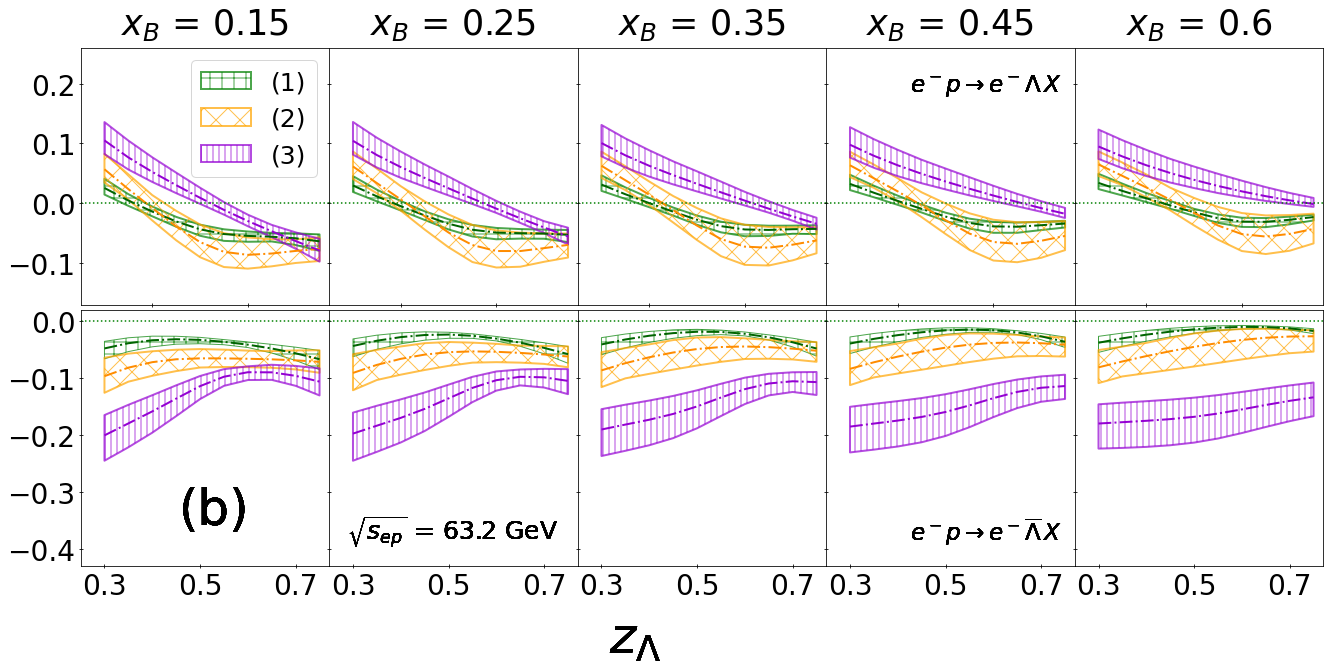

In [9]:
ct=1
xb=[0.15, 0.25, 0.35, 0.45, 0.6 , 0.15, 0.25, 0.35, 0.45, 0.6 ]
 
lim1=[-0.13,0.16]
lim2=[-0.4,0.02]
lim1=[-0.17,0.26]
lim2=[-0.43,0.02]

#lim1=[-0.09,0.11]
#lim2=[-0.18,0.02]

fig, axes = plt.subplots(1,10)
for xs,ax in zip(xb,axes):

    #fig.suptitle('$\Lambda$ - $\pi^+$ -- coef = '+str(coef)+' $\chi^2_{dof}$ = '+str(chi),fontsize=30)	
    dt1 = dati_lp1.loc[(dati_lp1['hads1']==310) & (dati_lp1['xb']==xs)& (dati_lp1['hads2']==100)]
    dt12 = dati_lp1.loc[(dati_lp1['hads1']==300) & (dati_lp1['xb']==xs)& (dati_lp1['hads2']==100)]

    dt2 = dati_lp2.loc[(dati_lp2['hads1']==310) & (dati_lp2['xb']==xs)& (dati_lp2['hads2']==100)]
    dt22 = dati_lp2.loc[(dati_lp2['hads1']==300) & (dati_lp2['xb']==xs)& (dati_lp2['hads2']==100)]

    dt3 = dati_lp3.loc[(dati_lp3['hads1']==310) & (dati_lp3['xb']==xs)& (dati_lp3['hads2']==100)]
    dt32 = dati_lp3.loc[(dati_lp3['hads1']==300) & (dati_lp3['xb']==xs)& (dati_lp3['hads2']==100)]


    if ct<=5:
        ax=plt.subplot(2,5,ct)

    ### new fit lines
        ax.plot(dt12.z1,dt12.conv,label='_(1)',linewidth=fit_l,linestyle='-.',color='darkgreen')
        ax.fill_between(dt12.z1,dt12.maxx,dt12.mins,label='(1)',linewidth=fit_l,color="none",hatch="+",edgecolor="green", alpha=0.7)

        ax.plot(dt12.z1,dt22.conv,label='_(2)',linewidth=fit_l,linestyle='-.',color='darkorange')
        ax.fill_between(dt12.z1,dt22.maxx,dt22.mins,label='(2)',linewidth=fit_l,color="none",hatch="x",edgecolor="orange", alpha=0.7)

        ax.plot(dt12.z1,dt32.conv,label='_(3)',linewidth=fit_l,linestyle='-.',color='darkviolet')
        ax.fill_between(dt12.z1,dt32.maxx,dt32.mins,label='(3)',linewidth=fit_l,color="none",hatch="||",edgecolor="darkviolet", alpha=0.7)

        #if xs == 0.25: title("0.2<$z_{\Lambda}$<0.3 ",fontsize=title_s,x=0.5, y=1)
        #if xs == 0.35: title("0.3<$z_{\Lambda}$<0.4 ",fontsize=title_s,x=0.5, y=1)
        #if xs == 0.45: title("0.4<$z_{\Lambda}$<0.5 ",fontsize=title_s,x=0.5, y=1)
        #if xs == 0.6: title("0.5<$z_{\Lambda}$<0.9 ",fontsize=title_s,x=0.5, y=1)
        title("$x_B$ = "+str(xs),fontsize=title_s,x=0.5, y=1.03)

    
        axhline(linewidth=1.5, ls=':', color='g')
    ### experimental points with error bars

        ax.tick_params(axis='both',direction='inout', which='major', labelsize=28)
        ax.set_xticklabels([])
        #ax.set_yticks([-0.1,0.,0.1,0.2])
        if ct ==2 : ax.set_yticklabels([])
        if ct ==3 : ax.set_yticklabels([])
        if ct ==4 : ax.set_yticklabels([])
        if ct ==5 : ax.set_yticklabels([])            
        #if ct ==5 :legend(loc='upper right',bbox_to_anchor=(1.,1), fontsize=25,frameon=False), 
        ax.set_ylim(lim1)
        ax.locator_params(nbins=6, axis='y')
        plt.xticks(np.arange(0.2, 0.75+.15, .2))

            
            
    #xlabel("$z_{\pi}$",size=12)
    elif ct>5:
        ax=plt.subplot(2,5,ct)
        ax.plot(dt1.z1,dt1.conv,label='_nolegend_',linewidth=fit_l,linestyle='-.',color='darkgreen')
        ax.fill_between(dt1.z1,dt1.maxx,dt1.mins,label='(1)',color="none",hatch="+",edgecolor="green", alpha=0.7)
        #
        ax.plot(dt1.z1,dt2.conv,label='_nolegend_',linewidth=fit_l,linestyle='-.',color='darkorange')
        ax.fill_between(dt1.z1,dt2.maxx,dt2.mins,label='(2)',linewidth=fit_l,color="none",hatch="x",edgecolor="orange", alpha=0.7)
        #
        ax.plot(dt1.z1,dt3.conv,label='_nolegend_',linewidth=fit_l,linestyle='-.',color='darkviolet')
        ax.fill_between(dt1.z1,dt3.maxx,dt3.mins,label='(3)',linewidth=fit_l,color="none",hatch="||",edgecolor="darkviolet", alpha=0.7)

        axhline(linewidth=1.5, ls=':', color='g')
        ax.set_ylim(lim2)
        ax.locator_params(nbins=5, axis='y')
        plt.xticks(np.arange(0.3, 0.7+.1, .2))



        ax.tick_params(axis='both',direction='inout', which='major', labelsize=28)
        if ct >6: ax.set_yticklabels([])
    ax.set_xlim(limx)
    #if ct ==5 :legend(loc='upper right',bbox_to_anchor=(1.,1), fontsize=22,frameon=True), 
    if ct ==1 :legend(loc='upper right',bbox_to_anchor=(1,1), fontsize=25,frameon=True), 

        #if ct ==10 :legend(loc='upper right',bbox_to_anchor=(1.,0.25), fontsize=22,frameon=True), 
    #if ct==1:ylabel('Polarization',size=y_lbl) 
    #ax.set_ylim(lim)
    ct+=1
    fig.text(0.5, 0.1, r'$z_{\Lambda}$', ha='center',size=x_lbl)
    fig.text(0.2, 0.25, '(b)', ha='center',size=x_lbl)
    #fig.text(0.02, 0.35, 'Polarization',rotation=90, ha='center',size=y_lbl)
    fig.text(0.37, 0.23, '$\sqrt{s_{ep}}$ = '+str(sep)+' GeV', ha='center',size=25)
    fig.text(0.75, 0.75, r'$e^-p \rightarrow e^-\Lambda\, X$', ha='center',size=23)
    fig.text(0.75, 0.23, r'$e^-p \rightarrow e^-\overline{\Lambda}\, X$', ha='center',size=23)

    #fig.text(0.7, 0.65, 'Q = '+str(scale), ha='center',size=25)

fig.subplots_adjust(top=0.8,bottom=0.2,left=0.105,right=0.99,hspace=0.02,wspace=0.0)
fig.set_size_inches(19.5, 12, forward=True)
fig.savefig('plot_draft/Lb_prot_'+str(sep)+'_bands2.pdf')
fig.savefig('plot_draft/Lb_prot_'+str(sep)+'_bands2.png')


In [15]:
sep = 28.6 # 28.6, 44.7, 63.2, 104.9, 140.7
pdf_name1='CT14IC'# 'NNPDF40'#, 'CT14IC', 'CT10'
pdf_name2='NNPDF40'# 'NNPDF40'#, 'CT14IC', 'CT10'

IC=0

su2_1= 'no'
charm1='no'
su2_2= 'no'
charm2='yes'
su2_3= 'yes'
charm3='yes'
dati_lp1 = pd.read_csv(r'fit_parameters/bands_/dati_deuterium_su_charm_'+str(su2_1)+'_'+str(charm1)+'_scale_'+str(sep)+'_PDF_'+str(pdf_name1)+'_IC_'+str(IC)+'_def.csv')
dati_lp2 = pd.read_csv(r'fit_parameters/bands_/dati_deuterium_su_charm_'+str(su2_2)+'_'+str(charm2)+'_scale_'+str(sep)+'_PDF_'+str(pdf_name1)+'_IC_'+str(IC)+'_def.csv')
dati_lp3 = pd.read_csv(r'fit_parameters/bands_/dati_deuterium_su_charm_'+str(su2_3)+'_'+str(charm3)+'_scale_'+str(sep)+'_PDF_'+str(pdf_name1)+'_IC_'+str(IC)+'_def.csv')

In [16]:
#dati_lp1

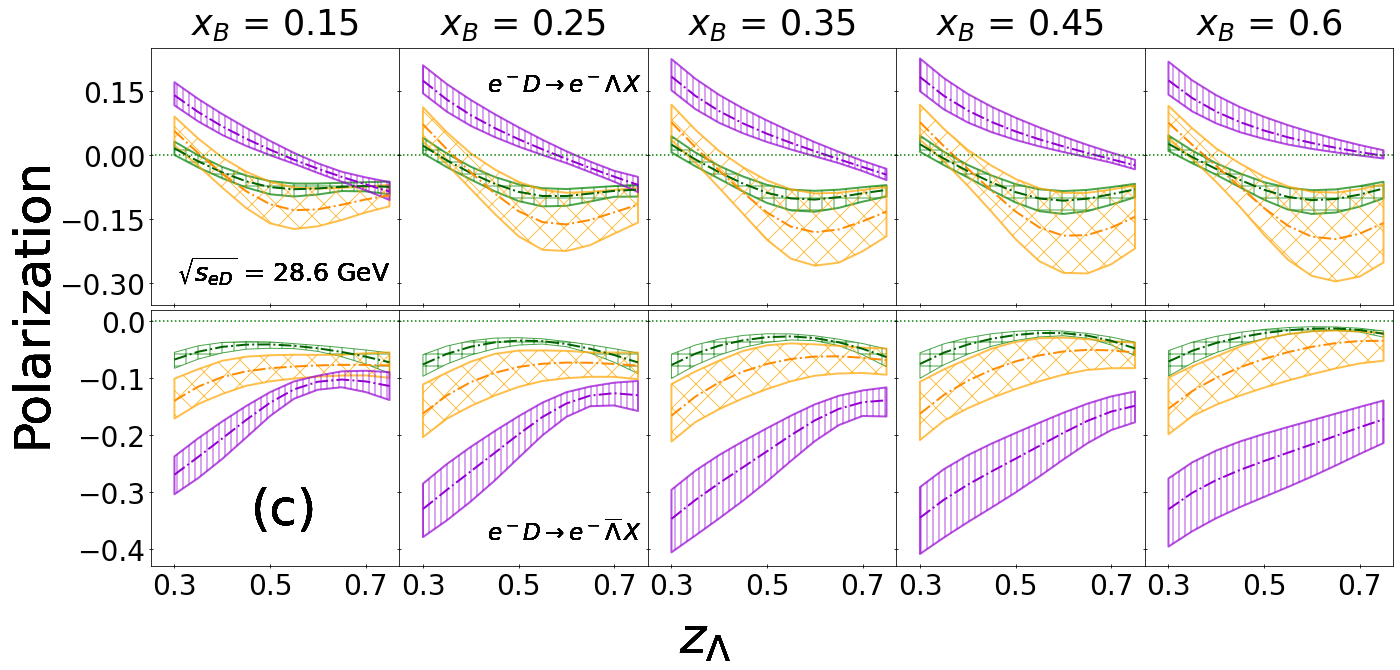

In [25]:
ct=1
xb=[0.15, 0.25, 0.35, 0.45, 0.6 , 0.15, 0.25, 0.35, 0.45, 0.6 ]
 
lim1=[-0.35,0.25]
lim2=[-0.43,0.02]

fig, axes = plt.subplots(1,10)
for xs,ax in zip(xb,axes):

    #fig.suptitle('$\Lambda$ - $\pi^+$ -- coef = '+str(coef)+' $\chi^2_{dof}$ = '+str(chi),fontsize=30)	
    dt1 = dati_lp1.loc[(dati_lp1['hads1']==310) & (dati_lp1['xb']==xs)& (dati_lp1['hads2']==105)]
    dt12 = dati_lp1.loc[(dati_lp1['hads1']==300) & (dati_lp1['xb']==xs)& (dati_lp1['hads2']==105)]

    dt2 = dati_lp2.loc[(dati_lp2['hads1']==310) & (dati_lp2['xb']==xs)& (dati_lp2['hads2']==105)]
    dt22 = dati_lp2.loc[(dati_lp2['hads1']==300) & (dati_lp2['xb']==xs)& (dati_lp2['hads2']==105)]

    dt3 = dati_lp3.loc[(dati_lp3['hads1']==310) & (dati_lp3['xb']==xs)& (dati_lp3['hads2']==105)]
    dt32 = dati_lp3.loc[(dati_lp3['hads1']==300) & (dati_lp3['xb']==xs)& (dati_lp3['hads2']==105)]


    if ct<=5:
        ax=plt.subplot(2,5,ct)

    ### new fit lines
        ax.plot(dt12.z1,dt12.conv,label='_(1)',linewidth=fit_l,linestyle='-.',color='darkgreen')
        ax.fill_between(dt12.z1,dt12.maxx,dt12.mins,label='(1)',linewidth=fit_l,color="none",hatch="+",edgecolor="green", alpha=0.7)

        ax.plot(dt12.z1,dt22.conv,label='_(2)',linewidth=fit_l,linestyle='-.',color='darkorange')
        ax.fill_between(dt12.z1,dt22.maxx,dt22.mins,label='(2)',linewidth=fit_l,color="none",hatch="x",edgecolor="orange", alpha=0.7)

        ax.plot(dt12.z1,dt32.conv,label='_(3)',linewidth=fit_l,linestyle='-.',color='darkviolet')
        ax.fill_between(dt12.z1,dt32.maxx,dt32.mins,label='(3)',linewidth=fit_l,color="none",hatch="||",edgecolor="darkviolet", alpha=0.7)
        title("$x_B$ = "+str(xs),fontsize=title_s,x=0.5, y=1.03)

        #if xs == 0.25: title("0.2<$z_{\Lambda}$<0.3 ",fontsize=title_s,x=0.5, y=1)
        #if xs == 0.35: title("0.3<$z_{\Lambda}$<0.4 ",fontsize=title_s,x=0.5, y=1)
        #if xs == 0.45: title("0.4<$z_{\Lambda}$<0.5 ",fontsize=title_s,x=0.5, y=1)
        #if xs == 0.6: title("0.5<$z_{\Lambda}$<0.9 ",fontsize=title_s,x=0.5, y=1)

    
        axhline(linewidth=1.5, ls=':', color='g')
    ### experimental points with error bars

        ax.tick_params(axis='both',direction='inout', which='major', labelsize=28)
        ax.set_xticklabels([])
        #ax.set_yticks([-0.1,0.,0.1,0.2])
        if ct ==2 : ax.set_yticklabels([])
        if ct ==3 : ax.set_yticklabels([])
        if ct ==4 : ax.set_yticklabels([])
        if ct ==5 : ax.set_yticklabels([])            
        #if ct ==5 :legend(loc='upper right',bbox_to_anchor=(1.,1), fontsize=25,frameon=False), 
        ax.set_ylim(lim1)
        plt.xticks(np.arange(0.3, 0.75+.25, .2))
        #plt.yticks(np.arange(-0.2, 0.3, .1))

        ax.locator_params(nbins=6, axis='y')
        plt.yticks(np.arange(-0.3, 0.15+.15, .15))

            
            
    #xlabel("$z_{\pi}$",size=12)
    elif ct>5:
        ax=plt.subplot(2,5,ct)
        ax.plot(dt1.z1,dt1.conv,label='_nolegend_',linewidth=fit_l,linestyle='-.',color='darkgreen')
        ax.fill_between(dt1.z1,dt1.maxx,dt1.mins,color="none",hatch="+",edgecolor="green", alpha=0.7)
        #
        ax.plot(dt1.z1,dt2.conv,label='_nolegend_',linewidth=fit_l,linestyle='-.',color='darkorange')
        ax.fill_between(dt1.z1,dt2.maxx,dt2.mins,linewidth=fit_l,color="none",hatch="x",edgecolor="orange", alpha=0.7)
        #
        ax.plot(dt1.z1,dt3.conv,label='_nolegend_',linewidth=fit_l,linestyle='-.',color='darkviolet')
        ax.fill_between(dt1.z1,dt3.maxx,dt3.mins,linewidth=fit_l,color="none",hatch="||",edgecolor="darkviolet", alpha=0.7)

        axhline(linewidth=1.5, ls=':', color='g')
        ax.set_ylim(lim2)
        plt.xticks(np.arange(0.3, 0.75+.25, .2))
        ax.locator_params(nbins=5, axis='y')



        ax.tick_params(axis='both',direction='inout', which='major', labelsize=28)
        if ct >6: ax.set_yticklabels([])
    ax.set_xlim(limx)

    #if ct ==5 :legend(loc='upper right',bbox_to_anchor=(1.,1), fontsize=22,frameon=True), 
    #if ct ==10 :legend(loc='upper right',bbox_to_anchor=(1.,0.25), fontsize=22,frameon=True), 
    #if ct==1:ylabel('Polarization',size=y_lbl) 
    #ax.set_ylim(lim)
    ct+=1
    fig.text(0.5, 0.1, r'$z_{\Lambda}$', ha='center',size=x_lbl)
    fig.text(0.2, 0.25, '(c)', ha='center',size=x_lbl)
    fig.text(0.02, 0.35, 'Polarization',rotation=90, ha='center',size=y_lbl)
    fig.text(0.2, 0.53, '$\sqrt{s_{eD}}$ = '+str(sep)+' GeV', ha='center',size=25)
    fig.text(0.4, 0.75, r'$e^-D \rightarrow e^-\Lambda\, X$', ha='center',size=23)
    fig.text(0.4, 0.23, r'$e^-D \rightarrow e^-\overline{\Lambda}\, X$', ha='center',size=23)

    #fig.text(0.7, 0.65, 'Q = '+str(scale), ha='center',size=25)
    #fig.text(0.2, 0.25, '(a)', ha='center',size=x_lbl)
    #fig.text(0.03, 0.35, 'Polarization',rotation=90, ha='center',size=y_lbl)
    #fig.text(0.2, 0.76, '$\sqrt{s_{ep}}$ = '+str(sep)+' GeV', ha='center',size=25)
    #fig.text(0.4, 0.75, r'$e^-p \rightarrow e^-\Lambda\, X$', ha='center',size=23)
    #fig.text(0.4, 0.23, r'$e^-p \rightarrow e^-\overline{\Lambda}\, X$', ha='center',size=23)

fig.subplots_adjust(top=0.8,bottom=0.2,left=0.105,right=0.99,hspace=0.02,wspace=0.0)
fig.set_size_inches(19.5, 12, forward=True)
fig.savefig('plot_draft/Lb_deut_'+str(sep)+'_bands2.pdf')
fig.savefig('plot_draft/Lb_deut_'+str(sep)+'_bands2.png')


In [26]:
sep = 63.2 # 28.6, 44.7, 63.2, 104.9, 140.7
pdf_name1='CT14IC'# 'NNPDF40'#, 'CT14IC', 'CT10'
pdf_name2='NNPDF40'# 'NNPDF40'#, 'CT14IC', 'CT10'

IC=0

su2_1= 'no'
charm1='no'
su2_2= 'no'
charm2='yes'
su2_3= 'yes'
charm3='yes'
dati_lp1 = pd.read_csv(r'fit_parameters/bands_/dati_deuterium_su_charm_'+str(su2_1)+'_'+str(charm1)+'_scale_'+str(sep)+'_PDF_'+str(pdf_name1)+'_IC_'+str(IC)+'_def.csv')
dati_lp2 = pd.read_csv(r'fit_parameters/bands_/dati_deuterium_su_charm_'+str(su2_2)+'_'+str(charm2)+'_scale_'+str(sep)+'_PDF_'+str(pdf_name1)+'_IC_'+str(IC)+'_def.csv')
dati_lp3 = pd.read_csv(r'fit_parameters/bands_/dati_deuterium_su_charm_'+str(su2_3)+'_'+str(charm3)+'_scale_'+str(sep)+'_PDF_'+str(pdf_name1)+'_IC_'+str(IC)+'_def.csv')

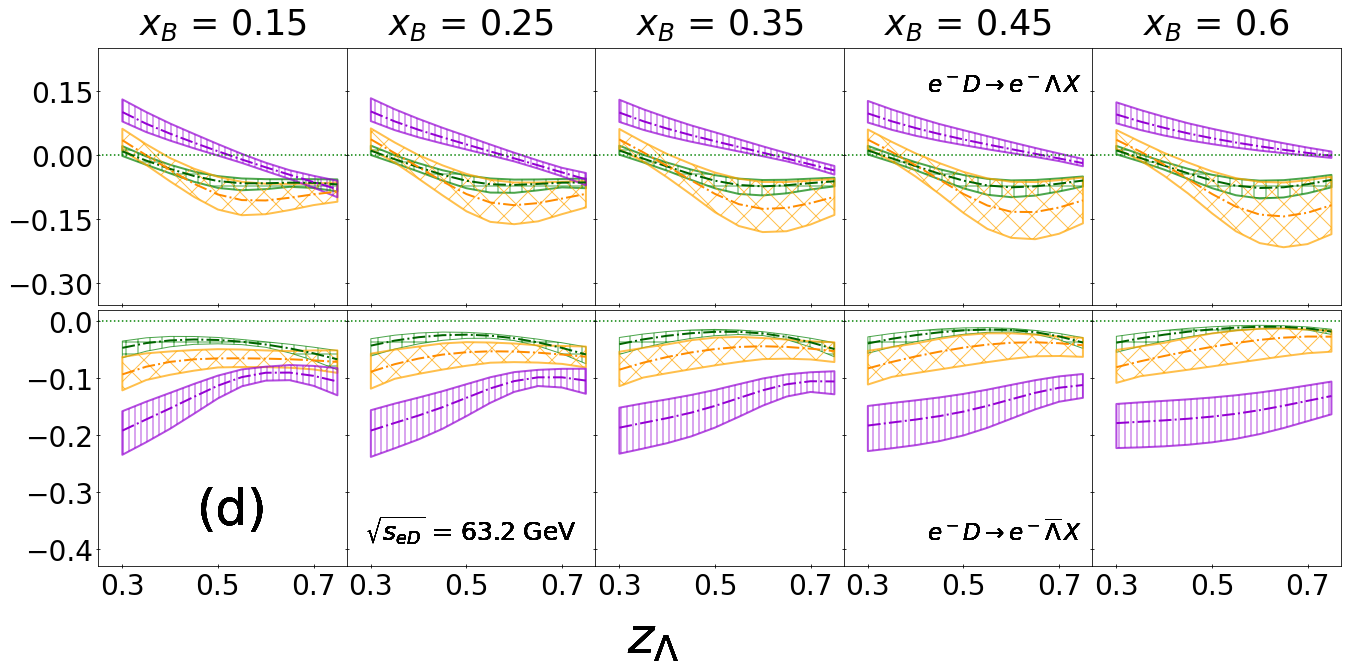

In [29]:
ct=1
xb=[0.15, 0.25, 0.35, 0.45, 0.6 , 0.15, 0.25, 0.35, 0.45, 0.6 ]
 
lim1=[-0.25,0.17]
lim2=[-0.4,0.02]
#
lim1=[-0.35,0.25]
lim2=[-0.43,0.02]

fig, axes = plt.subplots(1,10)
for xs,ax in zip(xb,axes):

    #fig.suptitle('$\Lambda$ - $\pi^+$ -- coef = '+str(coef)+' $\chi^2_{dof}$ = '+str(chi),fontsize=30)	
    dt1 = dati_lp1.loc[(dati_lp1['hads1']==310) & (dati_lp1['xb']==xs)& (dati_lp1['hads2']==105)]
    dt12 = dati_lp1.loc[(dati_lp1['hads1']==300) & (dati_lp1['xb']==xs)& (dati_lp1['hads2']==105)]

    dt2 = dati_lp2.loc[(dati_lp2['hads1']==310) & (dati_lp2['xb']==xs)& (dati_lp2['hads2']==105)]
    dt22 = dati_lp2.loc[(dati_lp2['hads1']==300) & (dati_lp2['xb']==xs)& (dati_lp2['hads2']==105)]

    dt3 = dati_lp3.loc[(dati_lp3['hads1']==310) & (dati_lp3['xb']==xs)& (dati_lp3['hads2']==105)]
    dt32 = dati_lp3.loc[(dati_lp3['hads1']==300) & (dati_lp3['xb']==xs)& (dati_lp3['hads2']==105)]


    if ct<=5:
        ax=plt.subplot(2,5,ct)

    ### new fit lines
        ax.plot(dt12.z1,dt12.conv,label='_(1)',linewidth=fit_l,linestyle='-.',color='darkgreen')
        ax.fill_between(dt12.z1,dt12.maxx,dt12.mins,label='(1)',linewidth=fit_l,color="none",hatch="+",edgecolor="green", alpha=0.7)

        ax.plot(dt12.z1,dt22.conv,label='_(2)',linewidth=fit_l,linestyle='-.',color='darkorange')
        ax.fill_between(dt12.z1,dt22.maxx,dt22.mins,label='(2)',linewidth=fit_l,color="none",hatch="x",edgecolor="orange", alpha=0.7)

        ax.plot(dt12.z1,dt32.conv,label='_(3)',linewidth=fit_l,linestyle='-.',color='darkviolet')
        ax.fill_between(dt12.z1,dt32.maxx,dt32.mins,label='(3)',linewidth=fit_l,color="none",hatch="||",edgecolor="darkviolet", alpha=0.7)
        title("$x_B$ = "+str(xs),fontsize=title_s,x=0.5, y=1.03)

        #if xs == 0.25: title("0.2<$z_{\Lambda}$<0.3 ",fontsize=title_s,x=0.5, y=1)
        #if xs == 0.35: title("0.3<$z_{\Lambda}$<0.4 ",fontsize=title_s,x=0.5, y=1)
        #if xs == 0.45: title("0.4<$z_{\Lambda}$<0.5 ",fontsize=title_s,x=0.5, y=1)
        #if xs == 0.6: title("0.5<$z_{\Lambda}$<0.9 ",fontsize=title_s,x=0.5, y=1)

    
        axhline(linewidth=1.5, ls=':', color='g')
    ### experimental points with error bars

        ax.tick_params(axis='both',direction='inout', which='major', labelsize=28)
        ax.set_xticklabels([])
        #ax.set_yticks([-0.1,0.,0.1,0.2])
        if ct ==2 : ax.set_yticklabels([])
        if ct ==3 : ax.set_yticklabels([])
        if ct ==4 : ax.set_yticklabels([])
        if ct ==5 : ax.set_yticklabels([])            
        #if ct ==5 :legend(loc='upper right',bbox_to_anchor=(1.,1), fontsize=25,frameon=False), 
        ax.set_ylim(lim1)
        plt.xticks(np.arange(0.3, 0.75+.25, .2))
        plt.yticks(np.arange(-0.3, 0.15+.15, .15))

            
            
    #xlabel("$z_{\pi}$",size=12)
    elif ct>5:
        ax=plt.subplot(2,5,ct)
        ax.plot(dt1.z1,dt1.conv,label='_nolegend_',linewidth=fit_l,linestyle='-.',color='darkgreen')
        ax.fill_between(dt1.z1,dt1.maxx,dt1.mins,color="none",hatch="+",edgecolor="green", alpha=0.7)
        #
        ax.plot(dt1.z1,dt2.conv,label='_nolegend_',linewidth=fit_l,linestyle='-.',color='darkorange')
        ax.fill_between(dt1.z1,dt2.maxx,dt2.mins,linewidth=fit_l,color="none",hatch="x",edgecolor="orange", alpha=0.7)
        #
        ax.plot(dt1.z1,dt3.conv,label='_nolegend_',linewidth=fit_l,linestyle='-.',color='darkviolet')
        ax.fill_between(dt1.z1,dt3.maxx,dt3.mins,linewidth=fit_l,color="none",hatch="||",edgecolor="darkviolet", alpha=0.7)

        axhline(linewidth=1.5, ls=':', color='g')
        ax.set_ylim(lim2)
        ax.locator_params(nbins=5, axis='y')



        plt.xticks(np.arange(0.3, 0.75+.25, .2))



        ax.tick_params(axis='both',direction='inout', which='major', labelsize=28)
        if ct >6: ax.set_yticklabels([])
    ax.set_xlim(limx)

    #if ct ==5 :legend(loc='upper right',bbox_to_anchor=(1.,1), fontsize=22,frameon=True), 
    #if ct ==10 :legend(loc='upper right',bbox_to_anchor=(1.,0.25), fontsize=22,frameon=True), 
    #if ct==1:ylabel('Polarization',size=y_lbl) 
    #ax.set_ylim(lim)
    ct+=1
    fig.text(0.5, 0.1, r'$z_{\Lambda}$', ha='center',size=x_lbl)
    fig.text(0.2, 0.25, '(d)', ha='center',size=x_lbl)
    #fig.text(0.03, 0.35, 'Polarization',rotation=90, ha='center',size=y_lbl)
    fig.text(0.37, 0.23, '$\sqrt{s_{eD}}$ = '+str(sep)+' GeV', ha='center',size=25)
    fig.text(0.75, 0.75, r'$e^-D \rightarrow e^-\Lambda\, X$', ha='center',size=23)
    fig.text(0.75, 0.23, r'$e^-D \rightarrow e^-\overline{\Lambda}\, X$', ha='center',size=23)

    #fig.text(0.5, 0.1, r'$z_{\Lambda}$', ha='center',size=x_lbl)
    #fig.text(0.22, 0.25, '(b)', ha='center',size=x_lbl)
    #fig.text(0.02, 0.35, 'Polarization',rotation=90, ha='center',size=y_lbl)
    #fig.text(0.37, 0.23, '$\sqrt{s_{ep}}$ = '+str(sep)+' GeV', ha='center',size=25)
    #fig.text(0.75, 0.75, r'$e^-p \rightarrow e^-\Lambda\, X$', ha='center',size=23)
    #fig.text(0.75, 0.23, r'$e^-p \rightarrow e^-\overline{\Lambda}\, X$', ha='center',size=23)

    #fig.text(0.7, 0.65, 'Q = '+str(scale), ha='center',size=25)

fig.subplots_adjust(top=0.8,bottom=0.2,left=0.105,right=0.99,hspace=0.02,wspace=0.0)
fig.set_size_inches(19.5, 12, forward=True)
fig.savefig('plot_draft/Lb_deut_'+str(sep)+'_bands2.pdf')
fig.savefig('plot_draft/Lb_deut_'+str(sep)+'_bands2.png')


# Plot con Intrinsic Charm

In [66]:
sep = 28.6 # 28.6, 44.7, 63.2, 104.9, 140.7
pdf_name1='CT14IC'# 'NNPDF40'#, 'CT14IC', 'CT10'
pdf_name2='NNPDF40'# 'NNPDF40'#, 'CT14IC', 'CT10'

IC=0

su2_1= 'yes'
charm1='yes'
su2_2= 'yes'
charm2='yes'
su2_3= 'yes'
charm3='yes'
dati_lp1 = pd.read_csv(r'fit_parameters/bands_/dati_lprot_su_charm_'+str(su2_1)+'_'+str(charm1)+'_scale_'+str(sep)+'_PDF_'+str(pdf_name1)+'_IC_'+str(0)+'_def.csv')
#dati_lp2 = pd.read_csv(r'fit_parameters/bands_/dati_lprot_su_charm_'+str(su2_2)+'_'+str(charm2)+'_scale_'+str(sep)+'_PDF_'+str(pdf_name1)+'_IC_'+str(1)+'_def.csv')
dati_lp3 = pd.read_csv(r'fit_parameters/bands_/dati_lprot_su_charm_'+str(su2_3)+'_'+str(charm3)+'_scale_'+str(sep)+'_PDF_'+str(pdf_name1)+'_IC_'+str(2)+'_def.csv')
dati_lp4 = pd.read_csv(r'fit_parameters/bands_/dati_lprot_su_charm_'+str(su2_3)+'_'+str(charm3)+'_scale_'+str(sep)+'_PDF_'+str(pdf_name2)+'_IC_'+str(0)+'_def.csv')

In [69]:
dati_lp4

,Unnamed: 0,hads1,hads2,z1,xb,conv,mins,maxx
0,0,300.0,100.0,0.30,0.15,0.054791,0.041751,0.072867
1,1,300.0,100.0,0.35,0.15,0.042475,0.030500,0.059592
2,2,300.0,100.0,0.40,0.15,0.029581,0.019344,0.044735
3,3,300.0,100.0,0.45,0.15,0.015542,0.007416,0.028604
4,4,300.0,100.0,0.50,0.15,0.000133,-0.006019,0.010630
...,...,...,...,...,...,...,...,...
95,5,310.0,100.0,0.55,0.60,-0.056878,-0.069567,-0.047474
96,6,310.0,100.0,0.60,0.60,-0.047746,-0.059010,-0.040899
97,7,310.0,100.0,0.65,0.60,-0.044092,-0.054470,-0.037552
98,8,310.0,100.0,0.70,0.60,-0.044067,-0.054930,-0.036551


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


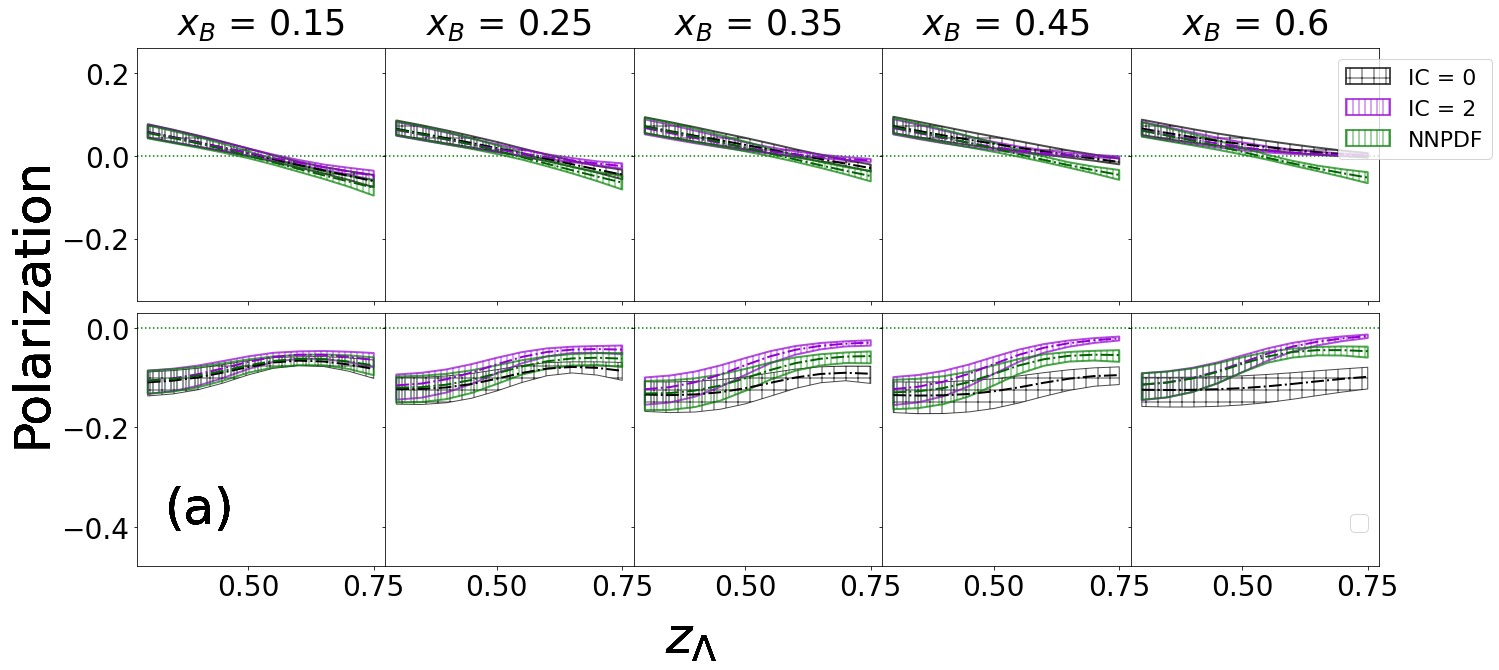

In [72]:
ct=1
xb=[ 0.15, 0.25, 0.35, 0.45, 0.6, 0.15, 0.25, 0.35, 0.45, 0.6 ]
 
lim1=[-0.35,0.26]
lim2=[-0.48,0.03]

fig, axes = plt.subplots(1,10)
for xs,ax in zip(xb,axes):

    #fig.suptitle('$\Lambda$ - $\pi^+$ -- coef = '+str(coef)+' $\chi^2_{dof}$ = '+str(chi),fontsize=30)	
    dt1 = dati_lp1.loc[(dati_lp1['hads1']==310) & (dati_lp1['xb']==xs)& (dati_lp1['hads2']==100)]
    dt12 = dati_lp1.loc[(dati_lp1['hads1']==300) & (dati_lp1['xb']==xs)& (dati_lp1['hads2']==100)]

    #dt2 = dati_lp2.loc[(dati_lp2['hads1']==310) & (dati_lp2['xb']==xs)& (dati_lp2['hads2']==100)]
    #dt22 = dati_lp2.loc[(dati_lp2['hads1']==300) & (dati_lp2['xb']==xs)& (dati_lp2['hads2']==100)]

    dt3 = dati_lp3.loc[(dati_lp3['hads1']==310) & (dati_lp3['xb']==xs)& (dati_lp3['hads2']==100)]
    dt32 = dati_lp3.loc[(dati_lp3['hads1']==300) & (dati_lp3['xb']==xs)& (dati_lp3['hads2']==100)]

    dt4 = dati_lp4.loc[(dati_lp4['hads1']==310) & (dati_lp4['xb']==xs)& (dati_lp4['hads2']==100)]
    dt42 = dati_lp4.loc[(dati_lp4['hads1']==300) & (dati_lp4['xb']==xs)& (dati_lp4['hads2']==100)]
    

    if ct<=5:
        ax=plt.subplot(2,5,ct)

    ### new fit lines
        ax.plot(dt12.z1,dt12.conv,label='_(1)',linewidth=fit_l,linestyle='-.',color='black')
        ax.fill_between(dt12.z1,dt12.maxx,dt12.mins,label='IC = 0',linewidth=fit_l,color="none",hatch="+",edgecolor="black", alpha=0.7)

        #ax.plot(dt12.z1,dt22.conv,label='_(2)',linewidth=fit_l,linestyle='-.',color='darkorange')
        #ax.fill_between(dt12.z1,dt22.maxx,dt22.mins,label='IC = 1',linewidth=fit_l,color="none",hatch="x",edgecolor="orange", alpha=0.7)

        ax.plot(dt12.z1,dt32.conv,label='_(3)',linewidth=fit_l,linestyle='-.',color='darkviolet')
        ax.fill_between(dt12.z1,dt32.maxx,dt32.mins,label='IC = 2',linewidth=fit_l,color="none",hatch="||",edgecolor="darkviolet", alpha=0.7)

        ax.plot(dt12.z1,dt42.conv,label='_(4)',linewidth=fit_l,linestyle='-.',color='darkgreen')
        ax.fill_between(dt12.z1,dt42.maxx,dt42.mins,label='NNPDF',linewidth=fit_l,color="none",hatch="||",edgecolor="green", alpha=0.7)

        
        title("$x_B$ = "+str(xs),fontsize=title_s,x=0.5, y=1.03)

        #if xs == 0.25: title("0.2<$z_{\Lambda}$<0.3 ",fontsize=title_s,x=0.5, y=1)
        #if xs == 0.35: title("0.3<$z_{\Lambda}$<0.4 ",fontsize=title_s,x=0.5, y=1)
        #if xs == 0.45: title("0.4<$z_{\Lambda}$<0.5 ",fontsize=title_s,x=0.5, y=1)
        #if xs == 0.6: title("0.5<$z_{\Lambda}$<0.9 ",fontsize=title_s,x=0.5, y=1)

    
        axhline(linewidth=1.5, ls=':', color='g')
    ### experimental points with error bars

        ax.tick_params(axis='both', which='major', labelsize=28)
        ax.set_xticklabels([])
        #ax.set_yticks([-0.1,0.,0.1,0.2])
        if ct ==2 : ax.set_yticklabels([])
        if ct ==3 : ax.set_yticklabels([])
        if ct ==4 : ax.set_yticklabels([])
        if ct ==5 : ax.set_yticklabels([])            
        #if ct ==5 :legend(loc='upper right',bbox_to_anchor=(1.,1), fontsize=25,frameon=False), 
        ax.set_ylim(lim1)

            
            
    #xlabel("$z_{\pi}$",size=12)
    elif ct>5:
        ax=plt.subplot(2,5,ct)
        ax.plot(dt1.z1,dt1.conv,label='_nolegend_',linewidth=fit_l,linestyle='-.',color='black')
        ax.fill_between(dt1.z1,dt1.maxx,dt1.mins,color="none",hatch="+",edgecolor="black", alpha=0.7)
        #
        #ax.plot(dt1.z1,dt2.conv,label='_nolegend_',linewidth=fit_l,linestyle='-.',color='darkorange')
        #ax.fill_between(dt1.z1,dt2.maxx,dt2.mins,linewidth=fit_l,color="none",hatch="x",edgecolor="orange", alpha=0.7)
        #
        ax.plot(dt1.z1,dt3.conv,label='_nolegend_',linewidth=fit_l,linestyle='-.',color='darkviolet')
        ax.fill_between(dt1.z1,dt3.maxx,dt3.mins,linewidth=fit_l,color="none",hatch="||",edgecolor="darkviolet", alpha=0.7)

        ax.plot(dt1.z1,dt4.conv,label='_nolegend_',linewidth=fit_l,linestyle='-.',color='darkgreen')
        ax.fill_between(dt1.z1,dt4.maxx,dt4.mins,linewidth=fit_l,color="none",hatch="||",edgecolor="green", alpha=0.7)

        
        axhline(linewidth=1.5, ls=':', color='g')
        ax.set_ylim(lim2)



        ax.tick_params(axis='both', which='major', labelsize=28)
        if ct >6: ax.set_yticklabels([])

    if ct ==5 :legend(loc='upper right',bbox_to_anchor=(1.5,1), fontsize=22,frameon=True), 
    if ct ==10 :legend(loc='upper right',bbox_to_anchor=(1.,0.25), fontsize=22,frameon=True), 
    #if ct==1:ylabel('Polarization',size=y_lbl) 
    #ax.set_ylim(lim)
    ct+=1
    fig.text(0.5, 0.1, r'$z_{\Lambda}$', ha='center',size=x_lbl)
    fig.text(0.15, 0.25, '(a)', ha='center',size=x_lbl)
    fig.text(0.03, 0.35, 'Polarization',rotation=90, ha='center',size=y_lbl)

    #fig.text(0.7, 0.65, 'Q = '+str(scale), ha='center',size=25)

fig.subplots_adjust(top=0.8,bottom=0.2,left=0.105,right=0.99,hspace=0.05,wspace=0.0)
fig.set_size_inches(19.5, 12, forward=True)
#fig.savefig('plot_draft/Lb_pi_bands2.pdf')
#fig.savefig('plot_draft/Lb_pi_bands2.png')

In [26]:
sep = 44.7 # 28.6, 44.7, 63.2, 104.9, 140.7
pdf_name1='CT14IC'# 'NNPDF40'#, 'CT14IC', 'CT10'
pdf_name2='NNPDF40'# 'NNPDF40'#, 'CT14IC', 'CT10'

IC=0

su2_1= 'yes'
charm1='yes'
su2_2= 'yes'
charm2='yes'
su2_3= 'yes'
charm3='yes'
dati_lp1 = pd.read_csv(r'fit_parameters/bands_/dati_deuterium_su_charm_'+str(su2_1)+'_'+str(charm1)+'_scale_'+str(sep)+'_PDF_'+str(pdf_name1)+'_IC_'+str(0)+'_def.csv')
dati_lp2 = pd.read_csv(r'fit_parameters/bands_/dati_deuterium_su_charm_'+str(su2_2)+'_'+str(charm2)+'_scale_'+str(sep)+'_PDF_'+str(pdf_name1)+'_IC_'+str(1)+'_def.csv')
dati_lp3 = pd.read_csv(r'fit_parameters/bands_/dati_deuterium_su_charm_'+str(su2_3)+'_'+str(charm3)+'_scale_'+str(sep)+'_PDF_'+str(pdf_name1)+'_IC_'+str(2)+'_def.csv')
dati_lp4 = pd.read_csv(r'fit_parameters/bands_/dati_deuterium_su_charm_'+str(su2_3)+'_'+str(charm3)+'_scale_'+str(sep)+'_PDF_'+str(pdf_name2)+'_IC_'+str(1)+'_def.csv')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


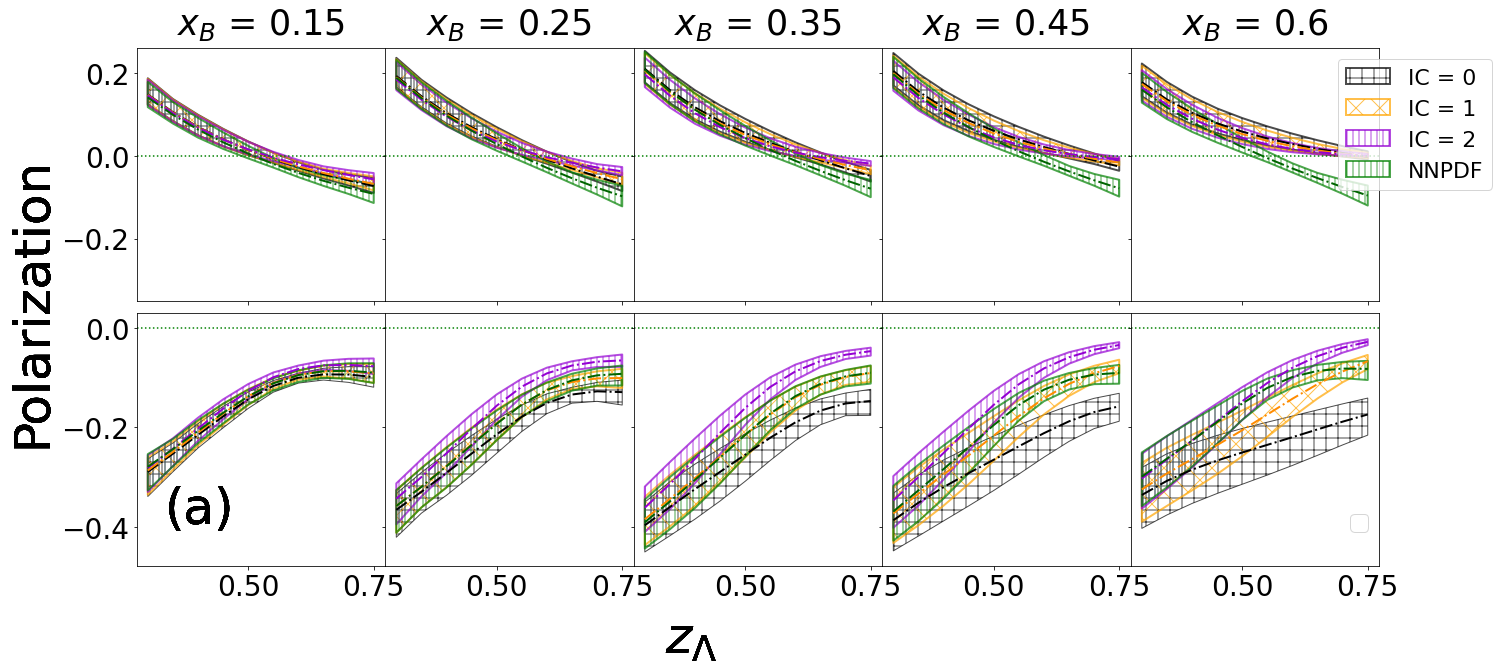

In [27]:
ct=1
xb=[ 0.15, 0.25, 0.35, 0.45, 0.6, 0.15, 0.25, 0.35, 0.45, 0.6 ]
 
lim1=[-0.35,0.26]
lim2=[-0.48,0.03]

fig, axes = plt.subplots(1,10)
for xs,ax in zip(xb,axes):

    #fig.suptitle('$\Lambda$ - $\pi^+$ -- coef = '+str(coef)+' $\chi^2_{dof}$ = '+str(chi),fontsize=30)	
    dt1 = dati_lp1.loc[(dati_lp1['hads1']==310) & (dati_lp1['xb']==xs)& (dati_lp1['hads2']==105)]
    dt12 = dati_lp1.loc[(dati_lp1['hads1']==300) & (dati_lp1['xb']==xs)& (dati_lp1['hads2']==105)]

    dt2 = dati_lp2.loc[(dati_lp2['hads1']==310) & (dati_lp2['xb']==xs)& (dati_lp2['hads2']==105)]
    dt22 = dati_lp2.loc[(dati_lp2['hads1']==300) & (dati_lp2['xb']==xs)& (dati_lp2['hads2']==105)]

    dt3 = dati_lp3.loc[(dati_lp3['hads1']==310) & (dati_lp3['xb']==xs)& (dati_lp3['hads2']==105)]
    dt32 = dati_lp3.loc[(dati_lp3['hads1']==300) & (dati_lp3['xb']==xs)& (dati_lp3['hads2']==105)]

    dt4 = dati_lp4.loc[(dati_lp4['hads1']==310) & (dati_lp4['xb']==xs)& (dati_lp4['hads2']==105)]
    dt42 = dati_lp4.loc[(dati_lp4['hads1']==300) & (dati_lp4['xb']==xs)& (dati_lp4['hads2']==105)]
    

    if ct<=5:
        ax=plt.subplot(2,5,ct)

    ### new fit lines
        ax.plot(dt12.z1,dt12.conv,label='_(1)',linewidth=fit_l,linestyle='-.',color='black')
        ax.fill_between(dt12.z1,dt12.maxx,dt12.mins,label='IC = 0',linewidth=fit_l,color="none",hatch="+",edgecolor="black", alpha=0.7)

        ax.plot(dt12.z1,dt22.conv,label='_(2)',linewidth=fit_l,linestyle='-.',color='darkorange')
        ax.fill_between(dt12.z1,dt22.maxx,dt22.mins,label='IC = 1',linewidth=fit_l,color="none",hatch="x",edgecolor="orange", alpha=0.7)

        ax.plot(dt12.z1,dt32.conv,label='_(3)',linewidth=fit_l,linestyle='-.',color='darkviolet')
        ax.fill_between(dt12.z1,dt32.maxx,dt32.mins,label='IC = 2',linewidth=fit_l,color="none",hatch="||",edgecolor="darkviolet", alpha=0.7)

        ax.plot(dt12.z1,dt42.conv,label='_(4)',linewidth=fit_l,linestyle='-.',color='darkgreen')
        ax.fill_between(dt12.z1,dt42.maxx,dt42.mins,label='NNPDF',linewidth=fit_l,color="none",hatch="||",edgecolor="green", alpha=0.7)

        
        title("$x_B$ = "+str(xs),fontsize=title_s,x=0.5, y=1.03)

        #if xs == 0.25: title("0.2<$z_{\Lambda}$<0.3 ",fontsize=title_s,x=0.5, y=1)
        #if xs == 0.35: title("0.3<$z_{\Lambda}$<0.4 ",fontsize=title_s,x=0.5, y=1)
        #if xs == 0.45: title("0.4<$z_{\Lambda}$<0.5 ",fontsize=title_s,x=0.5, y=1)
        #if xs == 0.6: title("0.5<$z_{\Lambda}$<0.9 ",fontsize=title_s,x=0.5, y=1)

    
        axhline(linewidth=1.5, ls=':', color='g')
    ### experimental points with error bars

        ax.tick_params(axis='both', which='major', labelsize=28)
        ax.set_xticklabels([])
        #ax.set_yticks([-0.1,0.,0.1,0.2])
        if ct ==2 : ax.set_yticklabels([])
        if ct ==3 : ax.set_yticklabels([])
        if ct ==4 : ax.set_yticklabels([])
        if ct ==5 : ax.set_yticklabels([])            
        #if ct ==5 :legend(loc='upper right',bbox_to_anchor=(1.,1), fontsize=25,frameon=False), 
        ax.set_ylim(lim1)

            
            
    #xlabel("$z_{\pi}$",size=12)
    elif ct>5:
        ax=plt.subplot(2,5,ct)
        ax.plot(dt1.z1,dt1.conv,label='_nolegend_',linewidth=fit_l,linestyle='-.',color='black')
        ax.fill_between(dt1.z1,dt1.maxx,dt1.mins,color="none",hatch="+",edgecolor="black", alpha=0.7)
        #
        ax.plot(dt1.z1,dt2.conv,label='_nolegend_',linewidth=fit_l,linestyle='-.',color='darkorange')
        ax.fill_between(dt1.z1,dt2.maxx,dt2.mins,linewidth=fit_l,color="none",hatch="x",edgecolor="orange", alpha=0.7)
        #
        ax.plot(dt1.z1,dt3.conv,label='_nolegend_',linewidth=fit_l,linestyle='-.',color='darkviolet')
        ax.fill_between(dt1.z1,dt3.maxx,dt3.mins,linewidth=fit_l,color="none",hatch="||",edgecolor="darkviolet", alpha=0.7)

        ax.plot(dt1.z1,dt4.conv,label='_nolegend_',linewidth=fit_l,linestyle='-.',color='darkgreen')
        ax.fill_between(dt1.z1,dt4.maxx,dt4.mins,linewidth=fit_l,color="none",hatch="||",edgecolor="green", alpha=0.7)

        
        axhline(linewidth=1.5, ls=':', color='g')
        ax.set_ylim(lim2)



        ax.tick_params(axis='both', which='major', labelsize=28)
        if ct >6: ax.set_yticklabels([])

    if ct ==5 :legend(loc='upper right',bbox_to_anchor=(1.5,1), fontsize=22,frameon=True), 
    if ct ==10 :legend(loc='upper right',bbox_to_anchor=(1.,0.25), fontsize=22,frameon=True), 
    #if ct==1:ylabel('Polarization',size=y_lbl) 
    #ax.set_ylim(lim)
    ct+=1
    fig.text(0.5, 0.1, r'$z_{\Lambda}$', ha='center',size=x_lbl)
    fig.text(0.15, 0.25, '(a)', ha='center',size=x_lbl)
    fig.text(0.03, 0.35, 'Polarization',rotation=90, ha='center',size=y_lbl)

    #fig.text(0.7, 0.65, 'Q = '+str(scale), ha='center',size=25)

fig.subplots_adjust(top=0.8,bottom=0.2,left=0.105,right=0.99,hspace=0.05,wspace=0.0)
fig.set_size_inches(19.5, 12, forward=True)
#fig.savefig('plot_draft/Lb_pi_bands2.pdf')
#fig.savefig('plot_draft/Lb_pi_bands2.png')

In [28]:
sep = 44.7 # 28.6, 44.7, 63.2, 104.9, 140.7
pdf_name1='CT14IC'# 'NNPDF40'#, 'CT14IC', 'CT10'
pdf_name2='NNPDF40'# 'NNPDF40'#, 'CT14IC', 'CT10'

IC=0

su2_1= 'no'
charm1='yes'
su2_2= 'no'
charm2='yes'
su2_3= 'no'
charm3='yes'
dati_lp1 = pd.read_csv(r'fit_parameters/bands_/dati_deuterium_su_charm_'+str(su2_1)+'_'+str(charm1)+'_scale_'+str(sep)+'_PDF_'+str(pdf_name1)+'_IC_'+str(0)+'_def.csv')
dati_lp2 = pd.read_csv(r'fit_parameters/bands_/dati_deuterium_su_charm_'+str(su2_2)+'_'+str(charm2)+'_scale_'+str(sep)+'_PDF_'+str(pdf_name1)+'_IC_'+str(1)+'_def.csv')
dati_lp3 = pd.read_csv(r'fit_parameters/bands_/dati_deuterium_su_charm_'+str(su2_3)+'_'+str(charm3)+'_scale_'+str(sep)+'_PDF_'+str(pdf_name1)+'_IC_'+str(2)+'_def.csv')
dati_lp4 = pd.read_csv(r'fit_parameters/bands_/dati_deuterium_su_charm_'+str(su2_3)+'_'+str(charm3)+'_scale_'+str(sep)+'_PDF_'+str(pdf_name2)+'_IC_'+str(1)+'_def.csv')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


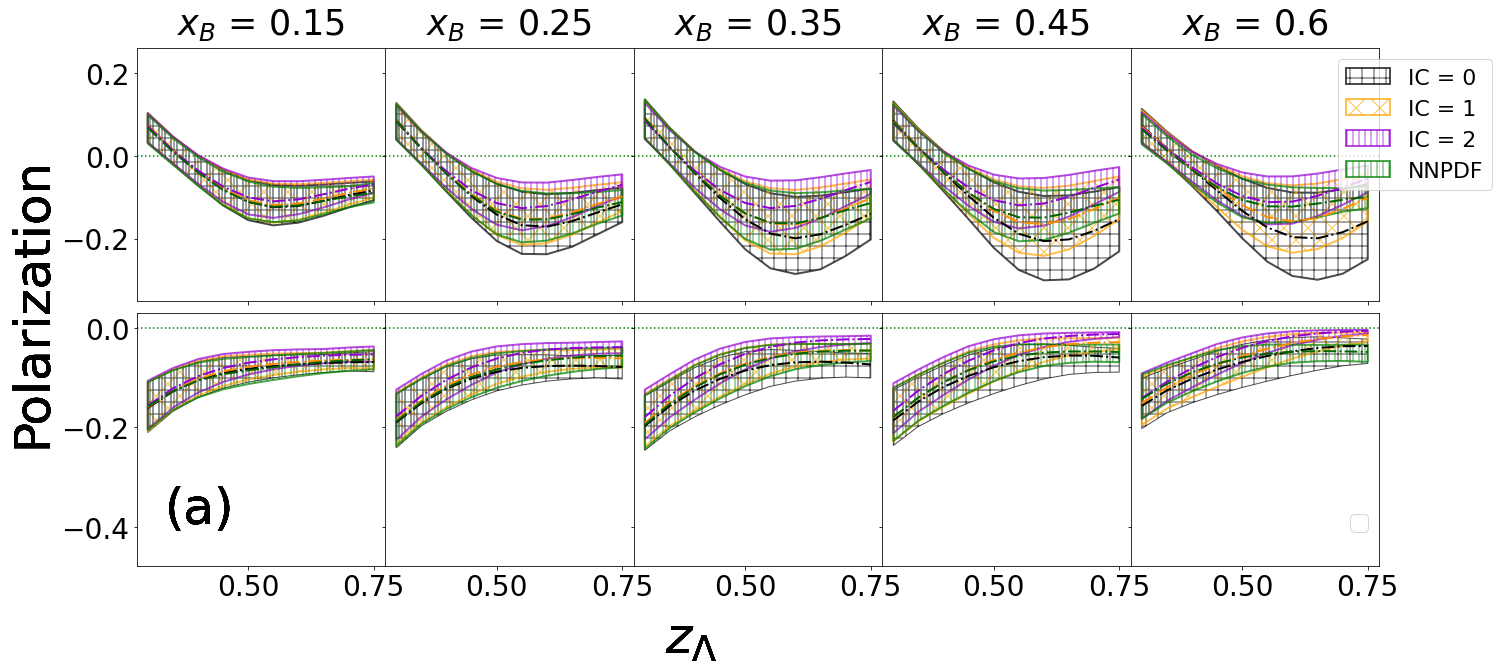

In [30]:
ct=1
xb=[ 0.15, 0.25, 0.35, 0.45, 0.6, 0.15, 0.25, 0.35, 0.45, 0.6 ]
 
lim1=[-0.35,0.26]
lim2=[-0.48,0.03]

fig, axes = plt.subplots(1,10)
for xs,ax in zip(xb,axes):

    #fig.suptitle('$\Lambda$ - $\pi^+$ -- coef = '+str(coef)+' $\chi^2_{dof}$ = '+str(chi),fontsize=30)	
    dt1 = dati_lp1.loc[(dati_lp1['hads1']==310) & (dati_lp1['xb']==xs)& (dati_lp1['hads2']==105)]
    dt12 = dati_lp1.loc[(dati_lp1['hads1']==300) & (dati_lp1['xb']==xs)& (dati_lp1['hads2']==105)]

    dt2 = dati_lp2.loc[(dati_lp2['hads1']==310) & (dati_lp2['xb']==xs)& (dati_lp2['hads2']==105)]
    dt22 = dati_lp2.loc[(dati_lp2['hads1']==300) & (dati_lp2['xb']==xs)& (dati_lp2['hads2']==105)]

    dt3 = dati_lp3.loc[(dati_lp3['hads1']==310) & (dati_lp3['xb']==xs)& (dati_lp3['hads2']==105)]
    dt32 = dati_lp3.loc[(dati_lp3['hads1']==300) & (dati_lp3['xb']==xs)& (dati_lp3['hads2']==105)]

    dt4 = dati_lp4.loc[(dati_lp4['hads1']==310) & (dati_lp4['xb']==xs)& (dati_lp4['hads2']==105)]
    dt42 = dati_lp4.loc[(dati_lp4['hads1']==300) & (dati_lp4['xb']==xs)& (dati_lp4['hads2']==105)]
    

    if ct<=5:
        ax=plt.subplot(2,5,ct)

    ### new fit lines
        ax.plot(dt12.z1,dt12.conv,label='_(1)',linewidth=fit_l,linestyle='-.',color='black')
        ax.fill_between(dt12.z1,dt12.maxx,dt12.mins,label='IC = 0',linewidth=fit_l,color="none",hatch="+",edgecolor="black", alpha=0.7)

        ax.plot(dt12.z1,dt22.conv,label='_(2)',linewidth=fit_l,linestyle='-.',color='darkorange')
        ax.fill_between(dt12.z1,dt22.maxx,dt22.mins,label='IC = 1',linewidth=fit_l,color="none",hatch="x",edgecolor="orange", alpha=0.7)

        ax.plot(dt12.z1,dt32.conv,label='_(3)',linewidth=fit_l,linestyle='-.',color='darkviolet')
        ax.fill_between(dt12.z1,dt32.maxx,dt32.mins,label='IC = 2',linewidth=fit_l,color="none",hatch="||",edgecolor="darkviolet", alpha=0.7)

        ax.plot(dt12.z1,dt42.conv,label='_(4)',linewidth=fit_l,linestyle='-.',color='darkgreen')
        ax.fill_between(dt12.z1,dt42.maxx,dt42.mins,label='NNPDF',linewidth=fit_l,color="none",hatch="||",edgecolor="green", alpha=0.7)

        
        title("$x_B$ = "+str(xs),fontsize=title_s,x=0.5, y=1.03)

        #if xs == 0.25: title("0.2<$z_{\Lambda}$<0.3 ",fontsize=title_s,x=0.5, y=1)
        #if xs == 0.35: title("0.3<$z_{\Lambda}$<0.4 ",fontsize=title_s,x=0.5, y=1)
        #if xs == 0.45: title("0.4<$z_{\Lambda}$<0.5 ",fontsize=title_s,x=0.5, y=1)
        #if xs == 0.6: title("0.5<$z_{\Lambda}$<0.9 ",fontsize=title_s,x=0.5, y=1)

    
        axhline(linewidth=1.5, ls=':', color='g')
    ### experimental points with error bars

        ax.tick_params(axis='both', which='major', labelsize=28)
        ax.set_xticklabels([])
        #ax.set_yticks([-0.1,0.,0.1,0.2])
        if ct ==2 : ax.set_yticklabels([])
        if ct ==3 : ax.set_yticklabels([])
        if ct ==4 : ax.set_yticklabels([])
        if ct ==5 : ax.set_yticklabels([])            
        #if ct ==5 :legend(loc='upper right',bbox_to_anchor=(1.,1), fontsize=25,frameon=False), 
        ax.set_ylim(lim1)

            
            
    #xlabel("$z_{\pi}$",size=12)
    elif ct>5:
        ax=plt.subplot(2,5,ct)
        ax.plot(dt1.z1,dt1.conv,label='_nolegend_',linewidth=fit_l,linestyle='-.',color='black')
        ax.fill_between(dt1.z1,dt1.maxx,dt1.mins,color="none",hatch="+",edgecolor="black", alpha=0.7)
        #
        ax.plot(dt1.z1,dt2.conv,label='_nolegend_',linewidth=fit_l,linestyle='-.',color='darkorange')
        ax.fill_between(dt1.z1,dt2.maxx,dt2.mins,linewidth=fit_l,color="none",hatch="x",edgecolor="orange", alpha=0.7)
        #
        ax.plot(dt1.z1,dt3.conv,label='_nolegend_',linewidth=fit_l,linestyle='-.',color='darkviolet')
        ax.fill_between(dt1.z1,dt3.maxx,dt3.mins,linewidth=fit_l,color="none",hatch="||",edgecolor="darkviolet", alpha=0.7)

        ax.plot(dt1.z1,dt4.conv,label='_nolegend_',linewidth=fit_l,linestyle='-.',color='darkgreen')
        ax.fill_between(dt1.z1,dt4.maxx,dt4.mins,linewidth=fit_l,color="none",hatch="||",edgecolor="green", alpha=0.7)

        
        axhline(linewidth=1.5, ls=':', color='g')
        ax.set_ylim(lim2)



        ax.tick_params(axis='both', which='major', labelsize=28)
        if ct >6: ax.set_yticklabels([])

    if ct ==5 :legend(loc='upper right',bbox_to_anchor=(1.5,1), fontsize=22,frameon=True), 
    if ct ==10 :legend(loc='upper right',bbox_to_anchor=(1.,0.25), fontsize=22,frameon=True), 
    #if ct==1:ylabel('Polarization',size=y_lbl) 
    #ax.set_ylim(lim)
    ct+=1
    fig.text(0.5, 0.1, r'$z_{\Lambda}$', ha='center',size=x_lbl)
    fig.text(0.15, 0.25, '(a)', ha='center',size=x_lbl)
    fig.text(0.03, 0.35, 'Polarization',rotation=90, ha='center',size=y_lbl)

    #fig.text(0.7, 0.65, 'Q = '+str(scale), ha='center',size=25)

fig.subplots_adjust(top=0.8,bottom=0.2,left=0.105,right=0.99,hspace=0.05,wspace=0.0)
fig.set_size_inches(19.5, 12, forward=True)
#fig.savefig('plot_draft/Lb_pi_bands2.pdf')
#fig.savefig('plot_draft/Lb_pi_bands2.png')

In [36]:
sep = 28.6 # 28.6, 44.7, 63.2, 104.9, 140.7
pdf_name1='CT14IC'# 'NNPDF40'#, 'CT14IC', 'CT10'
pdf_name2='NNPDF40'# 'NNPDF40'#, 'CT14IC', 'CT10'

IC=0

su2_1= 'yes'
charm1='yes'
su2_2= 'yes'
charm2='yes'
su2_3= 'yes'
charm3='yes'
dati_lp1 = pd.read_csv(r'fit_parameters/bands_/dati_lprot_su_charm_'+str(su2_1)+'_'+str(charm1)+'_scale_'+str(sep)+'_PDF_'+str(pdf_name1)+'_IC_'+str(0)+'_def.csv')
#dati_lp2 = pd.read_csv(r'fit_parameters/bands_/dati_deuterium_su_charm_'+str(su2_2)+'_'+str(charm2)+'_scale_'+str(sep)+'_PDF_'+str(pdf_name1)+'_IC_'+str(1)+'_def.csv')
dati_lp3 = pd.read_csv(r'fit_parameters/bands_/dati_lprot_su_charm_'+str(su2_3)+'_'+str(charm3)+'_scale_'+str(sep)+'_PDF_'+str(pdf_name1)+'_IC_'+str(2)+'_def.csv')
dati_lp4 = pd.read_csv(r'fit_parameters/bands_/dati_lprot_su_charm_'+str(su2_3)+'_'+str(charm3)+'_scale_'+str(sep)+'_PDF_'+str(pdf_name2)+'_IC_'+str(1)+'_def.csv')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


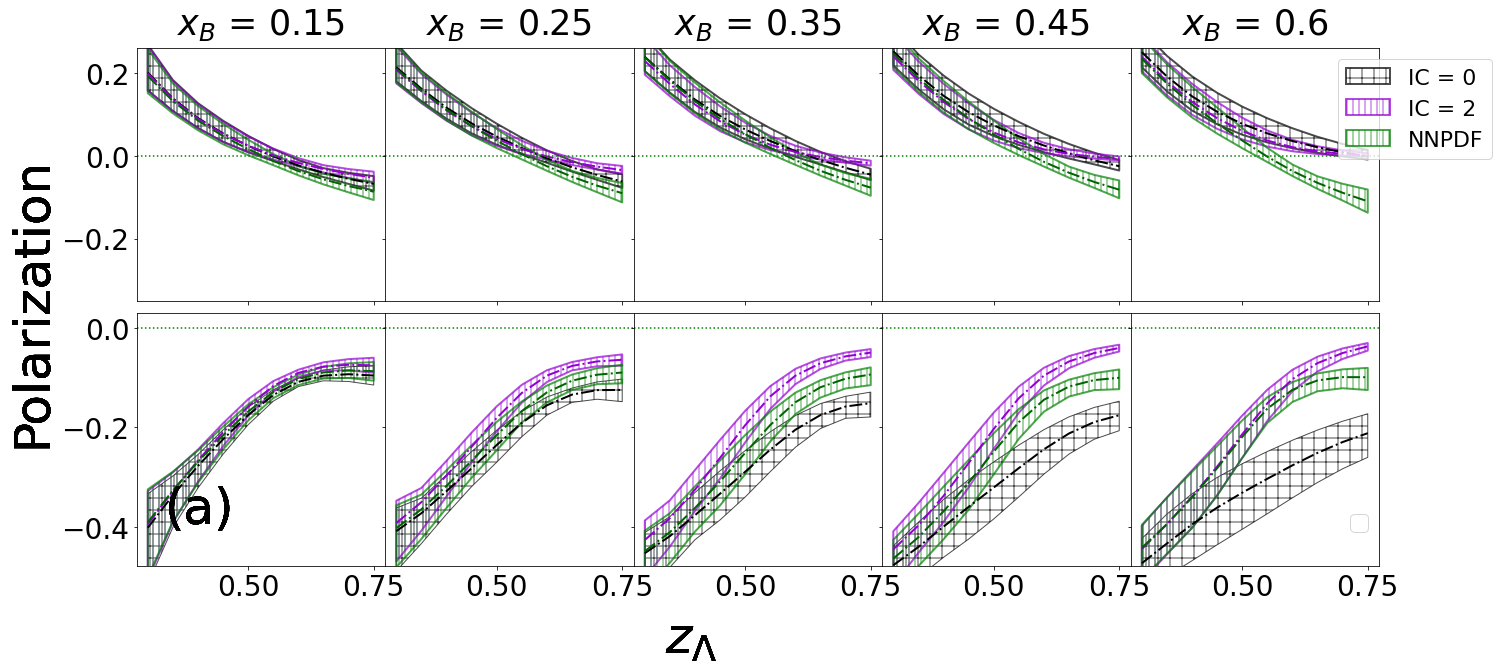

In [37]:
ct=1
xb=[ 0.15, 0.25, 0.35, 0.45, 0.6, 0.15, 0.25, 0.35, 0.45, 0.6 ]
 
lim1=[-0.35,0.26]
lim2=[-0.48,0.03]

fig, axes = plt.subplots(1,10)
for xs,ax in zip(xb,axes):

    #fig.suptitle('$\Lambda$ - $\pi^+$ -- coef = '+str(coef)+' $\chi^2_{dof}$ = '+str(chi),fontsize=30)	
    dt1 = dati_lp1.loc[(dati_lp1['hads1']==310) & (dati_lp1['xb']==xs)& (dati_lp1['hads2']==100)]
    dt12 = dati_lp1.loc[(dati_lp1['hads1']==300) & (dati_lp1['xb']==xs)& (dati_lp1['hads2']==100)]

    #dt2 = dati_lp2.loc[(dati_lp2['hads1']==310) & (dati_lp2['xb']==xs)& (dati_lp2['hads2']==100)]
    #dt22 = dati_lp2.loc[(dati_lp2['hads1']==300) & (dati_lp2['xb']==xs)& (dati_lp2['hads2']==100)]

    dt3 = dati_lp3.loc[(dati_lp3['hads1']==310) & (dati_lp3['xb']==xs)& (dati_lp3['hads2']==100)]
    dt32 = dati_lp3.loc[(dati_lp3['hads1']==300) & (dati_lp3['xb']==xs)& (dati_lp3['hads2']==100)]

    dt4 = dati_lp4.loc[(dati_lp4['hads1']==310) & (dati_lp4['xb']==xs)& (dati_lp4['hads2']==100)]
    dt42 = dati_lp4.loc[(dati_lp4['hads1']==300) & (dati_lp4['xb']==xs)& (dati_lp4['hads2']==100)]
    

    if ct<=5:
        ax=plt.subplot(2,5,ct)

    ### new fit lines
        ax.plot(dt12.z1,dt12.conv,label='_(1)',linewidth=fit_l,linestyle='-.',color='black')
        ax.fill_between(dt12.z1,dt12.maxx,dt12.mins,label='IC = 0',linewidth=fit_l,color="none",hatch="+",edgecolor="black", alpha=0.7)

        #ax.plot(dt12.z1,dt22.conv,label='_(2)',linewidth=fit_l,linestyle='-.',color='darkorange')
        #ax.fill_between(dt12.z1,dt22.maxx,dt22.mins,label='(2)',linewidth=fit_l,color="none",hatch="x",edgecolor="orange", alpha=0.7)

        ax.plot(dt12.z1,dt32.conv,label='_(3)',linewidth=fit_l,linestyle='-.',color='darkviolet')
        ax.fill_between(dt12.z1,dt32.maxx,dt32.mins,label='IC = 2',linewidth=fit_l,color="none",hatch="||",edgecolor="darkviolet", alpha=0.7)

        ax.plot(dt12.z1,dt42.conv,label='_(4)',linewidth=fit_l,linestyle='-.',color='darkgreen')
        ax.fill_between(dt12.z1,dt42.maxx,dt42.mins,label='NNPDF',linewidth=fit_l,color="none",hatch="||",edgecolor="green", alpha=0.7)

        
        title("$x_B$ = "+str(xs),fontsize=title_s,x=0.5, y=1.03)

        #if xs == 0.25: title("0.2<$z_{\Lambda}$<0.3 ",fontsize=title_s,x=0.5, y=1)
        #if xs == 0.35: title("0.3<$z_{\Lambda}$<0.4 ",fontsize=title_s,x=0.5, y=1)
        #if xs == 0.45: title("0.4<$z_{\Lambda}$<0.5 ",fontsize=title_s,x=0.5, y=1)
        #if xs == 0.6: title("0.5<$z_{\Lambda}$<0.9 ",fontsize=title_s,x=0.5, y=1)

    
        axhline(linewidth=1.5, ls=':', color='g')
    ### experimental points with error bars

        ax.tick_params(axis='both', which='major', labelsize=28)
        ax.set_xticklabels([])
        #ax.set_yticks([-0.1,0.,0.1,0.2])
        if ct ==2 : ax.set_yticklabels([])
        if ct ==3 : ax.set_yticklabels([])
        if ct ==4 : ax.set_yticklabels([])
        if ct ==5 : ax.set_yticklabels([])            
        #if ct ==5 :legend(loc='upper right',bbox_to_anchor=(1.,1), fontsize=25,frameon=False), 
        ax.set_ylim(lim1)

            
            
    #xlabel("$z_{\pi}$",size=12)
    elif ct>5:
        ax=plt.subplot(2,5,ct)
        ax.plot(dt1.z1,dt1.conv,label='_nolegend_',linewidth=fit_l,linestyle='-.',color='black')
        ax.fill_between(dt1.z1,dt1.maxx,dt1.mins,color="none",hatch="+",edgecolor="black", alpha=0.7)
        #
        #ax.plot(dt1.z1,dt2.conv,label='_nolegend_',linewidth=fit_l,linestyle='-.',color='darkorange')
        #ax.fill_between(dt1.z1,dt2.maxx,dt2.mins,linewidth=fit_l,color="none",hatch="x",edgecolor="orange", alpha=0.7)
        #
        ax.plot(dt1.z1,dt3.conv,label='_nolegend_',linewidth=fit_l,linestyle='-.',color='darkviolet')
        ax.fill_between(dt1.z1,dt3.maxx,dt3.mins,linewidth=fit_l,color="none",hatch="||",edgecolor="darkviolet", alpha=0.7)

        ax.plot(dt1.z1,dt4.conv,label='_nolegend_',linewidth=fit_l,linestyle='-.',color='darkgreen')
        ax.fill_between(dt1.z1,dt4.maxx,dt4.mins,linewidth=fit_l,color="none",hatch="||",edgecolor="green", alpha=0.7)

        
        axhline(linewidth=1.5, ls=':', color='g')
        ax.set_ylim(lim2)



        ax.tick_params(axis='both', which='major', labelsize=28)
        if ct >6: ax.set_yticklabels([])

    if ct ==5 :legend(loc='upper right',bbox_to_anchor=(1.5,1), fontsize=22,frameon=True), 
    if ct ==10 :legend(loc='upper right',bbox_to_anchor=(1.,0.25), fontsize=22,frameon=True), 
    #if ct==1:ylabel('Polarization',size=y_lbl) 
    #ax.set_ylim(lim)
    ct+=1
    fig.text(0.5, 0.1, r'$z_{\Lambda}$', ha='center',size=x_lbl)
    fig.text(0.15, 0.25, '(a)', ha='center',size=x_lbl)
    fig.text(0.03, 0.35, 'Polarization',rotation=90, ha='center',size=y_lbl)

    #fig.text(0.7, 0.65, 'Q = '+str(scale), ha='center',size=25)

fig.subplots_adjust(top=0.8,bottom=0.2,left=0.105,right=0.99,hspace=0.05,wspace=0.0)
fig.set_size_inches(19.5, 12, forward=True)
#fig.savefig('plot_draft/Lb_pi_bands2.pdf')
#fig.savefig('plot_draft/Lb_pi_bands2.png')

In [42]:
sep = 28.6 # 28.6, 44.7, 63.2, 104.9, 140.7
pdf_name1='CT14IC'# 'NNPDF40'#, 'CT14IC', 'CT10'
pdf_name2='NNPDF40'# 'NNPDF40'#, 'CT14IC', 'CT10'

IC=0

su2_1= 'yes'
charm1='yes'
su2_2= 'yes'
charm2='yes'
su2_3= 'yes'
charm3='yes'
dati_lp1 = pd.read_csv(r'fit_parameters/bands_/dati_deuterium_su_charm_'+str(su2_1)+'_'+str(charm1)+'_scale_'+str(sep)+'_PDF_'+str(pdf_name1)+'_IC_'+str(0)+'_def.csv')
#dati_lp2 = pd.read_csv(r'fit_parameters/bands_/dati_deuterium_su_charm_'+str(su2_2)+'_'+str(charm2)+'_scale_'+str(sep)+'_PDF_'+str(pdf_name1)+'_IC_'+str(1)+'_def.csv')
dati_lp3 = pd.read_csv(r'fit_parameters/bands_/dati_deuterium_su_charm_'+str(su2_3)+'_'+str(charm3)+'_scale_'+str(sep)+'_PDF_'+str(pdf_name1)+'_IC_'+str(2)+'_def.csv')
dati_lp4 = pd.read_csv(r'fit_parameters/bands_/dati_deuterium_su_charm_'+str(su2_3)+'_'+str(charm3)+'_scale_'+str(sep)+'_PDF_'+str(pdf_name2)+'_IC_'+str(1)+'_def.csv')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


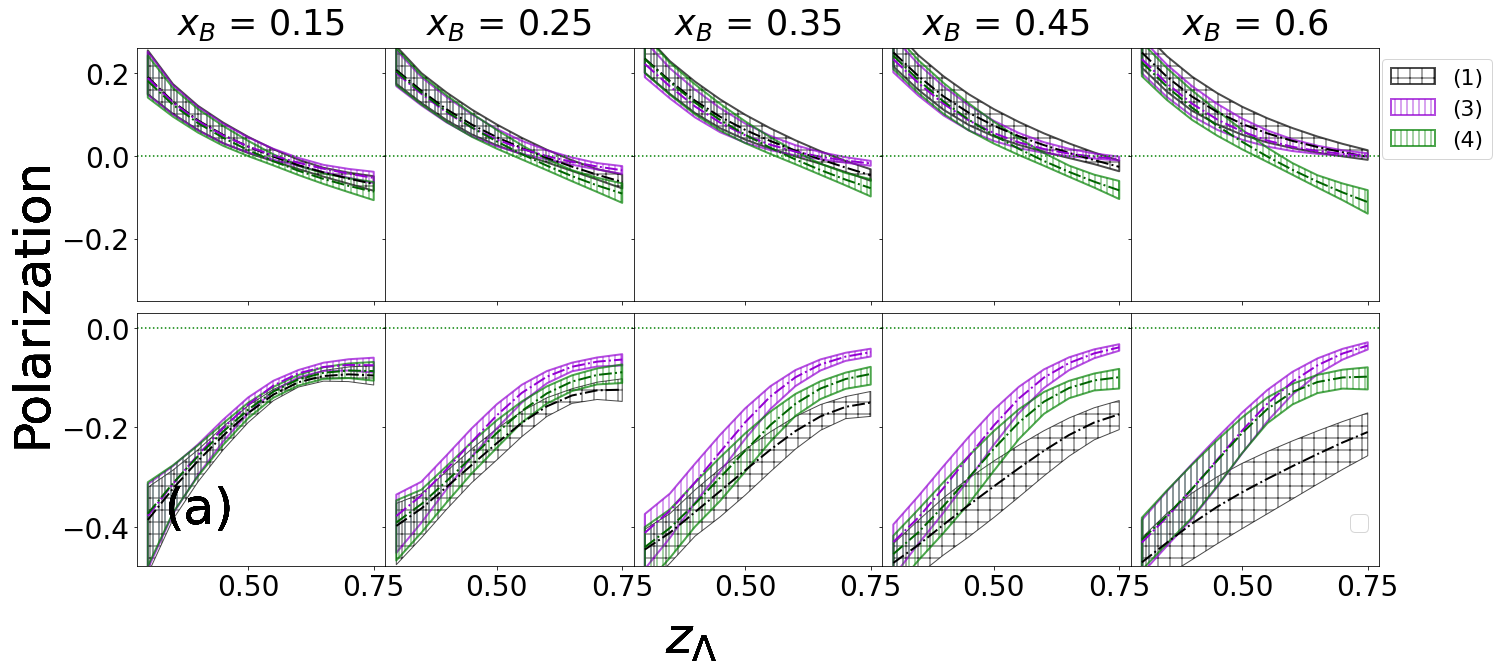

In [39]:
ct=1
xb=[ 0.15, 0.25, 0.35, 0.45, 0.6, 0.15, 0.25, 0.35, 0.45, 0.6 ]
 
lim1=[-0.35,0.26]
lim2=[-0.48,0.03]

fig, axes = plt.subplots(1,10)
for xs,ax in zip(xb,axes):

    #fig.suptitle('$\Lambda$ - $\pi^+$ -- coef = '+str(coef)+' $\chi^2_{dof}$ = '+str(chi),fontsize=30)	
    dt1 = dati_lp1.loc[(dati_lp1['hads1']==310) & (dati_lp1['xb']==xs)& (dati_lp1['hads2']==105)]
    dt12 = dati_lp1.loc[(dati_lp1['hads1']==300) & (dati_lp1['xb']==xs)& (dati_lp1['hads2']==105)]

    #dt2 = dati_lp2.loc[(dati_lp2['hads1']==310) & (dati_lp2['xb']==xs)& (dati_lp2['hads2']==100)]
    #dt22 = dati_lp2.loc[(dati_lp2['hads1']==300) & (dati_lp2['xb']==xs)& (dati_lp2['hads2']==100)]

    dt3 = dati_lp3.loc[(dati_lp3['hads1']==310) & (dati_lp3['xb']==xs)& (dati_lp3['hads2']==105)]
    dt32 = dati_lp3.loc[(dati_lp3['hads1']==300) & (dati_lp3['xb']==xs)& (dati_lp3['hads2']==105)]

    dt4 = dati_lp4.loc[(dati_lp4['hads1']==310) & (dati_lp4['xb']==xs)& (dati_lp4['hads2']==105)]
    dt42 = dati_lp4.loc[(dati_lp4['hads1']==300) & (dati_lp4['xb']==xs)& (dati_lp4['hads2']==105)]
    

    if ct<=5:
        ax=plt.subplot(2,5,ct)

    ### new fit lines
        ax.plot(dt12.z1,dt12.conv,label='_(1)',linewidth=fit_l,linestyle='-.',color='black')
        ax.fill_between(dt12.z1,dt12.maxx,dt12.mins,label='(1)',linewidth=fit_l,color="none",hatch="+",edgecolor="black", alpha=0.7)

        #ax.plot(dt12.z1,dt22.conv,label='_(2)',linewidth=fit_l,linestyle='-.',color='darkorange')
        #ax.fill_between(dt12.z1,dt22.maxx,dt22.mins,label='(2)',linewidth=fit_l,color="none",hatch="x",edgecolor="orange", alpha=0.7)

        ax.plot(dt12.z1,dt32.conv,label='_(3)',linewidth=fit_l,linestyle='-.',color='darkviolet')
        ax.fill_between(dt12.z1,dt32.maxx,dt32.mins,label='(3)',linewidth=fit_l,color="none",hatch="||",edgecolor="darkviolet", alpha=0.7)

        ax.plot(dt12.z1,dt42.conv,label='_(4)',linewidth=fit_l,linestyle='-.',color='darkgreen')
        ax.fill_between(dt12.z1,dt42.maxx,dt42.mins,label='(4)',linewidth=fit_l,color="none",hatch="||",edgecolor="green", alpha=0.7)

        
        title("$x_B$ = "+str(xs),fontsize=title_s,x=0.5, y=1.03)

        #if xs == 0.25: title("0.2<$z_{\Lambda}$<0.3 ",fontsize=title_s,x=0.5, y=1)
        #if xs == 0.35: title("0.3<$z_{\Lambda}$<0.4 ",fontsize=title_s,x=0.5, y=1)
        #if xs == 0.45: title("0.4<$z_{\Lambda}$<0.5 ",fontsize=title_s,x=0.5, y=1)
        #if xs == 0.6: title("0.5<$z_{\Lambda}$<0.9 ",fontsize=title_s,x=0.5, y=1)

    
        axhline(linewidth=1.5, ls=':', color='g')
    ### experimental points with error bars

        ax.tick_params(axis='both', which='major', labelsize=28)
        ax.set_xticklabels([])
        #ax.set_yticks([-0.1,0.,0.1,0.2])
        if ct ==2 : ax.set_yticklabels([])
        if ct ==3 : ax.set_yticklabels([])
        if ct ==4 : ax.set_yticklabels([])
        if ct ==5 : ax.set_yticklabels([])            
        #if ct ==5 :legend(loc='upper right',bbox_to_anchor=(1.,1), fontsize=25,frameon=False), 
        ax.set_ylim(lim1)

            
            
    #xlabel("$z_{\pi}$",size=12)
    elif ct>5:
        ax=plt.subplot(2,5,ct)
        ax.plot(dt1.z1,dt1.conv,label='_nolegend_',linewidth=fit_l,linestyle='-.',color='black')
        ax.fill_between(dt1.z1,dt1.maxx,dt1.mins,color="none",hatch="+",edgecolor="black", alpha=0.7)
        #
        #ax.plot(dt1.z1,dt2.conv,label='_nolegend_',linewidth=fit_l,linestyle='-.',color='darkorange')
        #ax.fill_between(dt1.z1,dt2.maxx,dt2.mins,linewidth=fit_l,color="none",hatch="x",edgecolor="orange", alpha=0.7)
        #
        ax.plot(dt1.z1,dt3.conv,label='_nolegend_',linewidth=fit_l,linestyle='-.',color='darkviolet')
        ax.fill_between(dt1.z1,dt3.maxx,dt3.mins,linewidth=fit_l,color="none",hatch="||",edgecolor="darkviolet", alpha=0.7)

        ax.plot(dt1.z1,dt4.conv,label='_nolegend_',linewidth=fit_l,linestyle='-.',color='darkgreen')
        ax.fill_between(dt1.z1,dt4.maxx,dt4.mins,linewidth=fit_l,color="none",hatch="||",edgecolor="green", alpha=0.7)

        
        axhline(linewidth=1.5, ls=':', color='g')
        ax.set_ylim(lim2)



        ax.tick_params(axis='both', which='major', labelsize=28)
        if ct >6: ax.set_yticklabels([])

    if ct ==5 :legend(loc='upper right',bbox_to_anchor=(1.5,1), fontsize=22,frameon=True), 
    if ct ==10 :legend(loc='upper right',bbox_to_anchor=(1.,0.25), fontsize=22,frameon=True), 
    #if ct==1:ylabel('Polarization',size=y_lbl) 
    #ax.set_ylim(lim)
    ct+=1
    fig.text(0.5, 0.1, r'$z_{\Lambda}$', ha='center',size=x_lbl)
    fig.text(0.15, 0.25, '(a)', ha='center',size=x_lbl)
    fig.text(0.03, 0.35, 'Polarization',rotation=90, ha='center',size=y_lbl)

    #fig.text(0.7, 0.65, 'Q = '+str(scale), ha='center',size=25)

fig.subplots_adjust(top=0.8,bottom=0.2,left=0.105,right=0.99,hspace=0.05,wspace=0.0)
fig.set_size_inches(19.5, 12, forward=True)
#fig.savefig('plot_draft/Lb_pi_bands2.pdf')
#fig.savefig('plot_draft/Lb_pi_bands2.png')

In [40]:
sep = 28.6 # 28.6, 44.7, 63.2, 104.9, 140.7
pdf_name1='CT14IC'# 'NNPDF40'#, 'CT14IC', 'CT10'
pdf_name2='NNPDF40'# 'NNPDF40'#, 'CT14IC', 'CT10'

IC=0

su2_1= 'no'
charm1='yes'
su2_2= 'no'
charm2='yes'
su2_3= 'no'
charm3='yes'
dati_lp1 = pd.read_csv(r'fit_parameters/bands_/dati_deuterium_su_charm_'+str(su2_1)+'_'+str(charm1)+'_scale_'+str(sep)+'_PDF_'+str(pdf_name1)+'_IC_'+str(0)+'_def.csv')
#dati_lp2 = pd.read_csv(r'fit_parameters/bands_/dati_deuterium_su_charm_'+str(su2_2)+'_'+str(charm2)+'_scale_'+str(sep)+'_PDF_'+str(pdf_name1)+'_IC_'+str(1)+'_def.csv')
dati_lp3 = pd.read_csv(r'fit_parameters/bands_/dati_deuterium_su_charm_'+str(su2_3)+'_'+str(charm3)+'_scale_'+str(sep)+'_PDF_'+str(pdf_name1)+'_IC_'+str(2)+'_def.csv')
dati_lp4 = pd.read_csv(r'fit_parameters/bands_/dati_deuterium_su_charm_'+str(su2_3)+'_'+str(charm3)+'_scale_'+str(sep)+'_PDF_'+str(pdf_name2)+'_IC_'+str(1)+'_def.csv')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


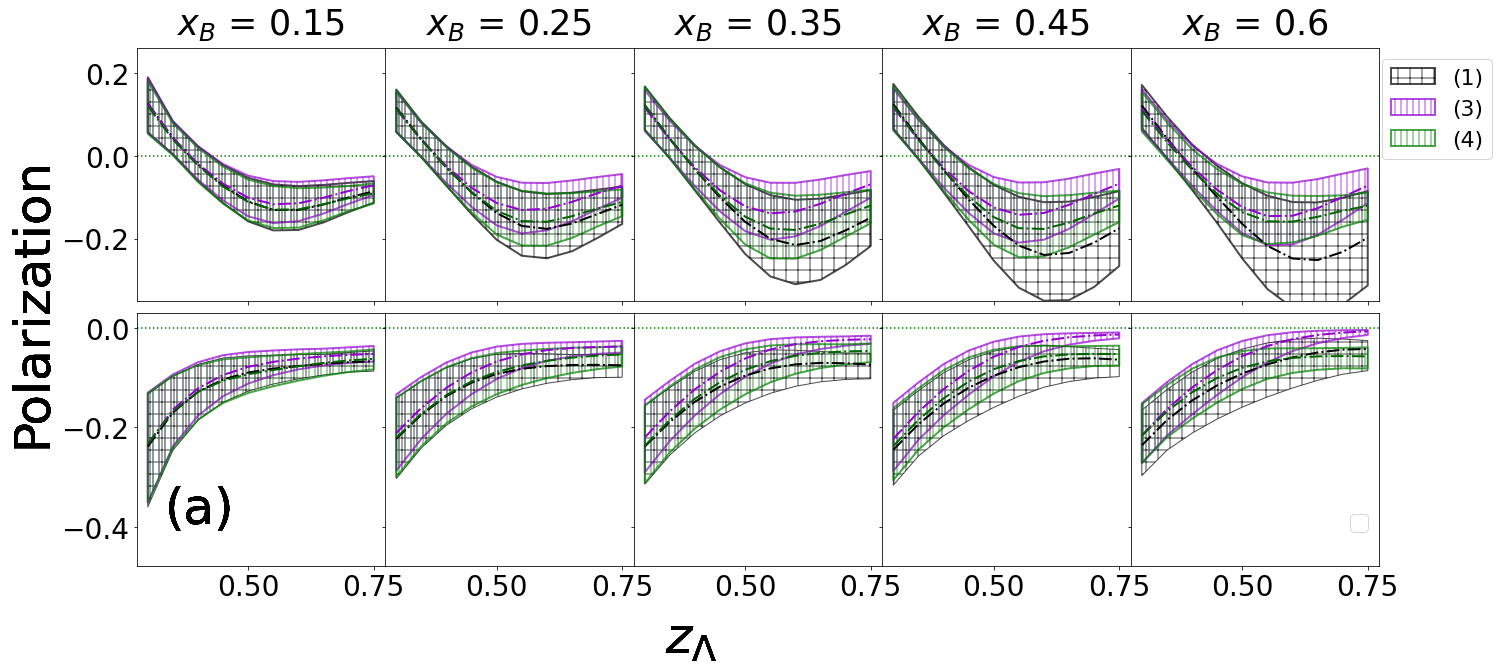

In [41]:
ct=1
xb=[ 0.15, 0.25, 0.35, 0.45, 0.6, 0.15, 0.25, 0.35, 0.45, 0.6 ]
 
lim1=[-0.35,0.26]
lim2=[-0.48,0.03]

fig, axes = plt.subplots(1,10)
for xs,ax in zip(xb,axes):

    #fig.suptitle('$\Lambda$ - $\pi^+$ -- coef = '+str(coef)+' $\chi^2_{dof}$ = '+str(chi),fontsize=30)	
    dt1 = dati_lp1.loc[(dati_lp1['hads1']==310) & (dati_lp1['xb']==xs)& (dati_lp1['hads2']==105)]
    dt12 = dati_lp1.loc[(dati_lp1['hads1']==300) & (dati_lp1['xb']==xs)& (dati_lp1['hads2']==105)]

    #dt2 = dati_lp2.loc[(dati_lp2['hads1']==310) & (dati_lp2['xb']==xs)& (dati_lp2['hads2']==100)]
    #dt22 = dati_lp2.loc[(dati_lp2['hads1']==300) & (dati_lp2['xb']==xs)& (dati_lp2['hads2']==100)]

    dt3 = dati_lp3.loc[(dati_lp3['hads1']==310) & (dati_lp3['xb']==xs)& (dati_lp3['hads2']==105)]
    dt32 = dati_lp3.loc[(dati_lp3['hads1']==300) & (dati_lp3['xb']==xs)& (dati_lp3['hads2']==105)]

    dt4 = dati_lp4.loc[(dati_lp4['hads1']==310) & (dati_lp4['xb']==xs)& (dati_lp4['hads2']==105)]
    dt42 = dati_lp4.loc[(dati_lp4['hads1']==300) & (dati_lp4['xb']==xs)& (dati_lp4['hads2']==105)]
    

    if ct<=5:
        ax=plt.subplot(2,5,ct)

    ### new fit lines
        ax.plot(dt12.z1,dt12.conv,label='_(1)',linewidth=fit_l,linestyle='-.',color='black')
        ax.fill_between(dt12.z1,dt12.maxx,dt12.mins,label='(1)',linewidth=fit_l,color="none",hatch="+",edgecolor="black", alpha=0.7)

        #ax.plot(dt12.z1,dt22.conv,label='_(2)',linewidth=fit_l,linestyle='-.',color='darkorange')
        #ax.fill_between(dt12.z1,dt22.maxx,dt22.mins,label='(2)',linewidth=fit_l,color="none",hatch="x",edgecolor="orange", alpha=0.7)

        ax.plot(dt12.z1,dt32.conv,label='_(3)',linewidth=fit_l,linestyle='-.',color='darkviolet')
        ax.fill_between(dt12.z1,dt32.maxx,dt32.mins,label='(3)',linewidth=fit_l,color="none",hatch="||",edgecolor="darkviolet", alpha=0.7)

        ax.plot(dt12.z1,dt42.conv,label='_(4)',linewidth=fit_l,linestyle='-.',color='darkgreen')
        ax.fill_between(dt12.z1,dt42.maxx,dt42.mins,label='(4)',linewidth=fit_l,color="none",hatch="||",edgecolor="green", alpha=0.7)

        
        title("$x_B$ = "+str(xs),fontsize=title_s,x=0.5, y=1.03)

        #if xs == 0.25: title("0.2<$z_{\Lambda}$<0.3 ",fontsize=title_s,x=0.5, y=1)
        #if xs == 0.35: title("0.3<$z_{\Lambda}$<0.4 ",fontsize=title_s,x=0.5, y=1)
        #if xs == 0.45: title("0.4<$z_{\Lambda}$<0.5 ",fontsize=title_s,x=0.5, y=1)
        #if xs == 0.6: title("0.5<$z_{\Lambda}$<0.9 ",fontsize=title_s,x=0.5, y=1)

    
        axhline(linewidth=1.5, ls=':', color='g')
    ### experimental points with error bars

        ax.tick_params(axis='both', which='major', labelsize=28)
        ax.set_xticklabels([])
        #ax.set_yticks([-0.1,0.,0.1,0.2])
        if ct ==2 : ax.set_yticklabels([])
        if ct ==3 : ax.set_yticklabels([])
        if ct ==4 : ax.set_yticklabels([])
        if ct ==5 : ax.set_yticklabels([])            
        #if ct ==5 :legend(loc='upper right',bbox_to_anchor=(1.,1), fontsize=25,frameon=False), 
        ax.set_ylim(lim1)

            
            
    #xlabel("$z_{\pi}$",size=12)
    elif ct>5:
        ax=plt.subplot(2,5,ct)
        ax.plot(dt1.z1,dt1.conv,label='_nolegend_',linewidth=fit_l,linestyle='-.',color='black')
        ax.fill_between(dt1.z1,dt1.maxx,dt1.mins,color="none",hatch="+",edgecolor="black", alpha=0.7)
        #
        #ax.plot(dt1.z1,dt2.conv,label='_nolegend_',linewidth=fit_l,linestyle='-.',color='darkorange')
        #ax.fill_between(dt1.z1,dt2.maxx,dt2.mins,linewidth=fit_l,color="none",hatch="x",edgecolor="orange", alpha=0.7)
        #
        ax.plot(dt1.z1,dt3.conv,label='_nolegend_',linewidth=fit_l,linestyle='-.',color='darkviolet')
        ax.fill_between(dt1.z1,dt3.maxx,dt3.mins,linewidth=fit_l,color="none",hatch="||",edgecolor="darkviolet", alpha=0.7)

        ax.plot(dt1.z1,dt4.conv,label='_nolegend_',linewidth=fit_l,linestyle='-.',color='darkgreen')
        ax.fill_between(dt1.z1,dt4.maxx,dt4.mins,linewidth=fit_l,color="none",hatch="||",edgecolor="green", alpha=0.7)

        
        axhline(linewidth=1.5, ls=':', color='g')
        ax.set_ylim(lim2)



        ax.tick_params(axis='both', which='major', labelsize=28)
        if ct >6: ax.set_yticklabels([])

    if ct ==5 :legend(loc='upper right',bbox_to_anchor=(1.5,1), fontsize=22,frameon=True), 
    if ct ==10 :legend(loc='upper right',bbox_to_anchor=(1.,0.25), fontsize=22,frameon=True), 
    #if ct==1:ylabel('Polarization',size=y_lbl) 
    #ax.set_ylim(lim)
    ct+=1
    fig.text(0.5, 0.1, r'$z_{\Lambda}$', ha='center',size=x_lbl)
    fig.text(0.15, 0.25, '(a)', ha='center',size=x_lbl)
    fig.text(0.03, 0.35, 'Polarization',rotation=90, ha='center',size=y_lbl)

    #fig.text(0.7, 0.65, 'Q = '+str(scale), ha='center',size=25)

fig.subplots_adjust(top=0.8,bottom=0.2,left=0.105,right=0.99,hspace=0.05,wspace=0.0)
fig.set_size_inches(19.5, 12, forward=True)
#fig.savefig('plot_draft/Lb_pi_bands2.pdf')
#fig.savefig('plot_draft/Lb_pi_bands2.png')

In [44]:
sep = 44.7 # 28.6, 44.7, 63.2, 104.9, 140.7
pdf_name1='CT14IC'# 'NNPDF40'#, 'CT14IC', 'CT10'
pdf_name2='NNPDF40'# 'NNPDF40'#, 'CT14IC', 'CT10'

IC=0

su2_1= 'no'
charm1='yes'
su2_2= 'no'
charm2='yes'

su2_3= 'yes'
charm3='yes'
su2_4= 'yes'
charm4='yes'

dati_lp1 = pd.read_csv(r'fit_parameters/bands_/dati_deuterium_su_charm_'+str(su2_1)+'_'+str(charm1)+'_scale_'+str(sep)+'_PDF_'+str(pdf_name1)+'_IC_'+str(2)+'_def.csv')
dati_lp2 = pd.read_csv(r'fit_parameters/bands_/dati_deuterium_su_charm_'+str(su2_2)+'_'+str(charm2)+'_scale_'+str(sep)+'_PDF_'+str(pdf_name2)+'_IC_'+str(1)+'_def.csv')

dati_lp3 = pd.read_csv(r'fit_parameters/bands_/dati_deuterium_su_charm_'+str(su2_3)+'_'+str(charm3)+'_scale_'+str(sep)+'_PDF_'+str(pdf_name1)+'_IC_'+str(2)+'_def.csv')
dati_lp4 = pd.read_csv(r'fit_parameters/bands_/dati_deuterium_su_charm_'+str(su2_4)+'_'+str(charm4)+'_scale_'+str(sep)+'_PDF_'+str(pdf_name2)+'_IC_'+str(1)+'_def.csv')

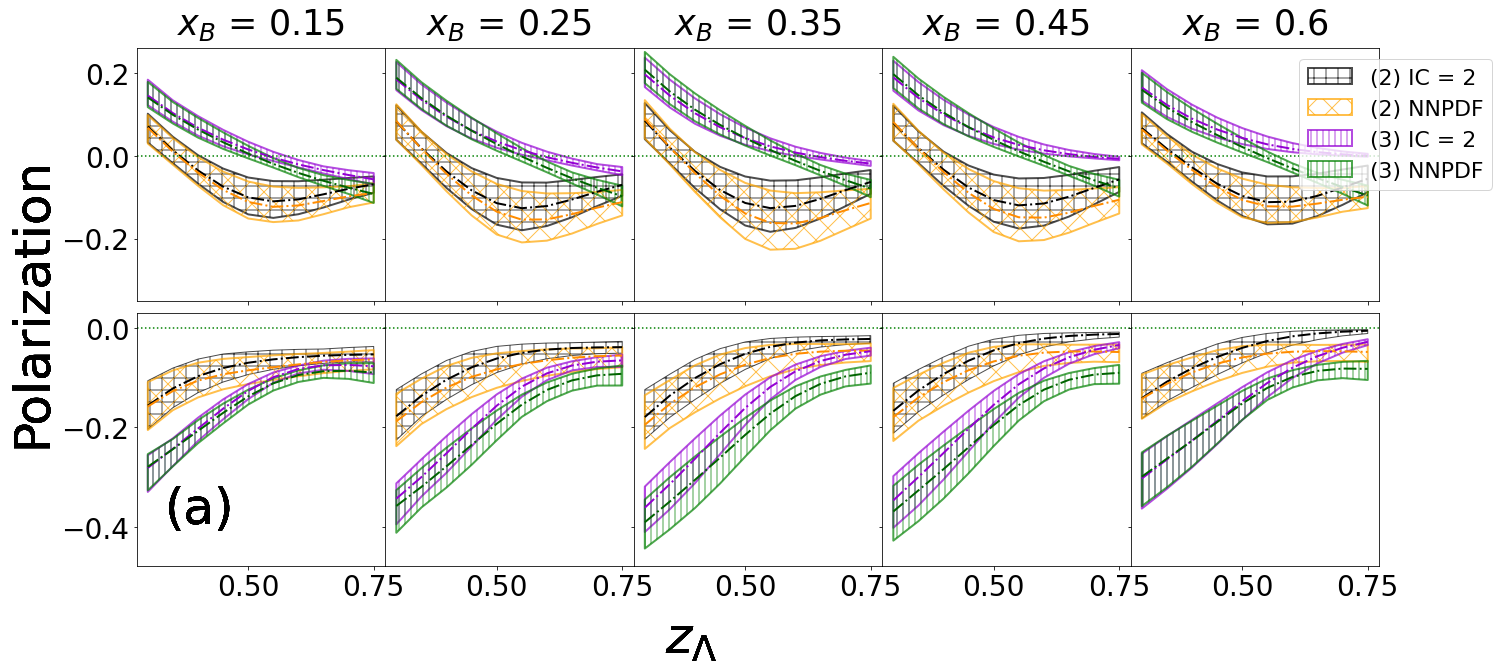

In [47]:
ct=1
xb=[ 0.15, 0.25, 0.35, 0.45, 0.6, 0.15, 0.25, 0.35, 0.45, 0.6 ]
 
lim1=[-0.35,0.26]
lim2=[-0.48,0.03]

fig, axes = plt.subplots(1,10)
for xs,ax in zip(xb,axes):

    #fig.suptitle('$\Lambda$ - $\pi^+$ -- coef = '+str(coef)+' $\chi^2_{dof}$ = '+str(chi),fontsize=30)	
    dt1 = dati_lp1.loc[(dati_lp1['hads1']==310) & (dati_lp1['xb']==xs)& (dati_lp1['hads2']==105)]
    dt12 = dati_lp1.loc[(dati_lp1['hads1']==300) & (dati_lp1['xb']==xs)& (dati_lp1['hads2']==105)]

    dt2 = dati_lp2.loc[(dati_lp2['hads1']==310) & (dati_lp2['xb']==xs)& (dati_lp2['hads2']==105)]
    dt22 = dati_lp2.loc[(dati_lp2['hads1']==300) & (dati_lp2['xb']==xs)& (dati_lp2['hads2']==105)]

    dt3 = dati_lp3.loc[(dati_lp3['hads1']==310) & (dati_lp3['xb']==xs)& (dati_lp3['hads2']==105)]
    dt32 = dati_lp3.loc[(dati_lp3['hads1']==300) & (dati_lp3['xb']==xs)& (dati_lp3['hads2']==105)]

    dt4 = dati_lp4.loc[(dati_lp4['hads1']==310) & (dati_lp4['xb']==xs)& (dati_lp4['hads2']==105)]
    dt42 = dati_lp4.loc[(dati_lp4['hads1']==300) & (dati_lp4['xb']==xs)& (dati_lp4['hads2']==105)]
    

    if ct<=5:
        ax=plt.subplot(2,5,ct)

    ### new fit lines
        ax.plot(dt12.z1,dt12.conv,label='_(1)',linewidth=fit_l,linestyle='-.',color='black')
        ax.fill_between(dt12.z1,dt12.maxx,dt12.mins,label='(2) IC = 2',linewidth=fit_l,color="none",hatch="+",edgecolor="black", alpha=0.7)

        ax.plot(dt12.z1,dt22.conv,label='_(2)',linewidth=fit_l,linestyle='-.',color='darkorange')
        ax.fill_between(dt12.z1,dt22.maxx,dt22.mins,label='(2) NNPDF',linewidth=fit_l,color="none",hatch="x",edgecolor="orange", alpha=0.7)

        ax.plot(dt12.z1,dt32.conv,label='_(3)',linewidth=fit_l,linestyle='-.',color='darkviolet')
        ax.fill_between(dt12.z1,dt32.maxx,dt32.mins,label='(3) IC = 2',linewidth=fit_l,color="none",hatch="||",edgecolor="darkviolet", alpha=0.7)

        ax.plot(dt12.z1,dt42.conv,label='_(4)',linewidth=fit_l,linestyle='-.',color='darkgreen')
        ax.fill_between(dt12.z1,dt42.maxx,dt42.mins,label='(3) NNPDF',linewidth=fit_l,color="none",hatch="||",edgecolor="green", alpha=0.7)

        
        title("$x_B$ = "+str(xs),fontsize=title_s,x=0.5, y=1.03)

        #if xs == 0.25: title("0.2<$z_{\Lambda}$<0.3 ",fontsize=title_s,x=0.5, y=1)
        #if xs == 0.35: title("0.3<$z_{\Lambda}$<0.4 ",fontsize=title_s,x=0.5, y=1)
        #if xs == 0.45: title("0.4<$z_{\Lambda}$<0.5 ",fontsize=title_s,x=0.5, y=1)
        #if xs == 0.6: title("0.5<$z_{\Lambda}$<0.9 ",fontsize=title_s,x=0.5, y=1)

    
        axhline(linewidth=1.5, ls=':', color='g')
    ### experimental points with error bars

        ax.tick_params(axis='both', which='major', labelsize=28)
        ax.set_xticklabels([])
        #ax.set_yticks([-0.1,0.,0.1,0.2])
        if ct ==2 : ax.set_yticklabels([])
        if ct ==3 : ax.set_yticklabels([])
        if ct ==4 : ax.set_yticklabels([])
        if ct ==5 : ax.set_yticklabels([])            
        #if ct ==5 :legend(loc='upper right',bbox_to_anchor=(1.,1), fontsize=25,frameon=False), 
        ax.set_ylim(lim1)

            
            
    #xlabel("$z_{\pi}$",size=12)
    elif ct>5:
        ax=plt.subplot(2,5,ct)
        ax.plot(dt1.z1,dt1.conv,label='_nolegend_',linewidth=fit_l,linestyle='-.',color='black')
        ax.fill_between(dt1.z1,dt1.maxx,dt1.mins,color="none",hatch="+",edgecolor="black", alpha=0.7)
        #
        ax.plot(dt1.z1,dt2.conv,label='_nolegend_',linewidth=fit_l,linestyle='-.',color='darkorange')
        ax.fill_between(dt1.z1,dt2.maxx,dt2.mins,linewidth=fit_l,color="none",hatch="x",edgecolor="orange", alpha=0.7)
        #
        ax.plot(dt1.z1,dt3.conv,label='_nolegend_',linewidth=fit_l,linestyle='-.',color='darkviolet')
        ax.fill_between(dt1.z1,dt3.maxx,dt3.mins,linewidth=fit_l,color="none",hatch="||",edgecolor="darkviolet", alpha=0.7)

        ax.plot(dt1.z1,dt4.conv,label='_nolegend_',linewidth=fit_l,linestyle='-.',color='darkgreen')
        ax.fill_between(dt1.z1,dt4.maxx,dt4.mins,linewidth=fit_l,color="none",hatch="||",edgecolor="green", alpha=0.7)

        
        axhline(linewidth=1.5, ls=':', color='g')
        ax.set_ylim(lim2)



        ax.tick_params(axis='both', which='major', labelsize=28)
        if ct >6: ax.set_yticklabels([])

    if ct ==5 :legend(loc='upper right',bbox_to_anchor=(1.5,1), fontsize=22,frameon=True), 
    #if ct ==10 :legend(loc='upper right',bbox_to_anchor=(1.,0.25), fontsize=22,frameon=True), 
    #if ct==1:ylabel('Polarization',size=y_lbl) 
    #ax.set_ylim(lim)
    ct+=1
    fig.text(0.5, 0.1, r'$z_{\Lambda}$', ha='center',size=x_lbl)
    fig.text(0.15, 0.25, '(a)', ha='center',size=x_lbl)
    fig.text(0.03, 0.35, 'Polarization',rotation=90, ha='center',size=y_lbl)

    #fig.text(0.7, 0.65, 'Q = '+str(scale), ha='center',size=25)

fig.subplots_adjust(top=0.8,bottom=0.2,left=0.105,right=0.99,hspace=0.05,wspace=0.0)
fig.set_size_inches(19.5, 12, forward=True)
#fig.savefig('plot_draft/Lb_pi_bands2.pdf')
#fig.savefig('plot_draft/Lb_pi_bands2.png')

In [57]:
xb=np.array([ 0.15, 0.25, 0.35, 0.45, 0.60])
yy=0.4
ss=28.6
qs=np.round(ss*np.sqrt(xb*yy),2)
for x, q in zip(xb,qs):
    print(r'xb = '+str(x)+'|   q = '+str(q)+'|   $q_T$ = '+str(0.27*q))
    

xb = 0.15|   q = 7.01|   $q_T$ = 1.8927
xb = 0.25|   q = 9.04|   $q_T$ = 2.4408
xb = 0.35|   q = 10.7|   $q_T$ = 2.889
xb = 0.45|   q = 12.13|   $q_T$ = 3.2751000000000006
xb = 0.6|   q = 14.01|   $q_T$ = 3.7827


In [60]:
xb=np.array([ 0.15, 0.25, 0.35, 0.45, 0.60])
yy=0.4
ss=63.2
qs=np.round(ss*np.sqrt(xb*yy),2)
for x, q in zip(xb,qs):
    print(r'xb = '+str(x)+'|   q = '+str(q)+'|   $q_T$ = '+str(0.27*q))
    

xb = 0.15|   q = 15.48|   $q_T$ = 4.179600000000001
xb = 0.25|   q = 19.99|   $q_T$ = 5.3972999999999995
xb = 0.35|   q = 23.65|   $q_T$ = 6.3855
xb = 0.45|   q = 26.81|   $q_T$ = 7.2387
xb = 0.6|   q = 30.96|   $q_T$ = 8.359200000000001
